# Step 3 - Thực hiện phân tích dữ liệu - Data analysis
- Đã thực processing dữ liệu ra bộ dữ liệu mới
- Thực hiện lại các bước cần thiết trong data analysis
1. Import thư viện
2. Summary pre-processing
3. Data exploration
4. Data analysis 

## A. Import thư viện

In [1]:
# 1. Import library
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step2ml_utils_feature_selection as fea
import lib.step3ml_utils_model_design_testing_regression as reg
import lib.step4ml_utils_model_design_testing_explainability as exp
import lib.step5ml_utils_model_design_testing_visualize_models as vis
import lib.step6ml_utils_model_design_testing_geospatial_analysis as geo
import lib.step9ml_Text_Kmeans_Clustering as clu
import matplotlib
import matplotlib_inline
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## B. Summary pre-processing

### 1.1. Overview dữ liệu

In [2]:
dir_file = "data/avocado_processing.csv"
names = ['Key','Id','Date','AveragePrice','Total_Volume','Item_4046','Item_4225','Item_4770','Total_Bags','Small_Bags',
    'Large_Bags','XLarge_Bags','type','year','region','fea_id','fea_date','fea_year','fea_month','fea_day',
    'fea_weekofyear','fea_daily','fea_average_price','fea_total_Volume','fea_item_4046','fea_item_4225','fea_item_4770',
    'fea_total_Bags','fea_small_bags','fea_large_bags','fea_xlarge_bags','fea_type','fea_year_','fea_region'
]
df = pre.loadData(file_dir=dir_file, names=names)
df = df.iloc[1: , :]

In [3]:
df.head(5)

,Key,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,...,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region
1,1.00,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,2.00,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,3.00,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,...,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,4.00,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,...,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
5,5.00,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.columns

Index(['Key', 'Id', 'Date', 'AveragePrice', 'Total_Volume', 'Item_4046',
       'Item_4225', 'Item_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags',
       'XLarge_Bags', 'type', 'year', 'region', 'fea_id', 'fea_date',
       'fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily',
       'fea_average_price', 'fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'fea_type', 'fea_year_',
       'fea_region'],
      dtype='object')

 Categerocial   Numerical   NaN 


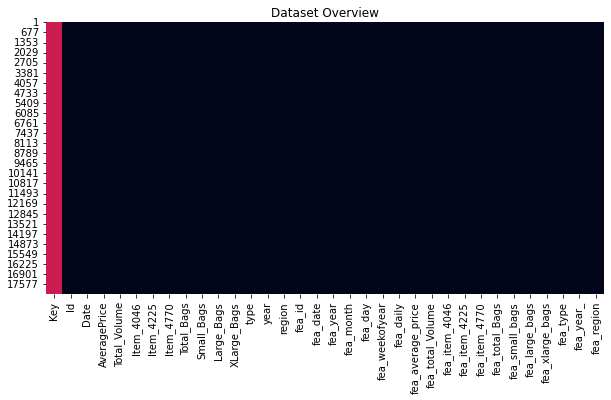

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [5]:
# Xem lại dữ liệu sắp xếp là category hay continious
pre.df_overview(df=df, choose="visualization")

In [6]:
# Xem lại dữ liệu sắp xếp là category hay continious
pre.df_overview(df=df, choose="dataframe", columns=['Feature', 'Type_Feature', 'NAS', 'Check_data', 'check'])

Shape: (18249, 34)
-----------------


,Feature,Type_Feature,NAS,Check_data,check
0,Key,Continious,Nas: 0(0%),Min-Max: (1)-(18249),Possible check
1,Id,categorical,Nas: 0(0%),Categories: 106,None
2,Date,categorical,Nas: 0(0%),Categories: 169,None
3,AveragePrice,categorical,Nas: 0(0%),Categories: 450,None
4,Total_Volume,categorical,Nas: 0(0%),Categories: 18239,None
5,Item_4046,categorical,Nas: 0(0%),Categories: 17760,None
6,Item_4225,categorical,Nas: 0(0%),Categories: 18126,None
7,Item_4770,categorical,Nas: 0(0%),Categories: 12230,None
8,Total_Bags,categorical,Nas: 0(0%),Categories: 18105,None
9,Small_Bags,categorical,Nas: 0(0%),Categories: 17363,None


### Nhận xét:
- Dữ liệu nan hoặc null: Không có
- Kiểm tra lại giá trị có bị âm không ? Vì các thuộc tính này đều là những thuộc tính dương
- Phân loại lst_continious và lst_categorical
- Thêm 1 số thuộc tính: 
    1. Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
    2. fea_total_Bags = fea_small_bags + fea_large_bags + fea_xlarge_bags
    3. Làm thế nào để xác định tháng có lượng bơ cao nhất và lượng túi bán ra nhiều nhất cao nhất?
    4. Phân khúc bán hàng nhiều nhật tại vùng theo từng loại
    5. Khoảng giá trung bình cho các item hoặc theo region

### 1.2. Processing_nan_null_change_type

#### 1.2.1. Change type

In [7]:
# Chuyển kiểu dữ liệu cho thuộc tính
# Chuyển đổi dữ liệu date
lst_float = ['fea_average_price', 'fea_total_Volume', 'fea_item_4046', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags', 'fea_large_bags', 'fea_xlarge_bags','AveragePrice', 'Total_Volume'
    , 'Item_4046', 'Item_4225', 'Item_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',]
lst_int = ['fea_id', 'fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'Key', 'Id', 'year', 'fea_year', 'fea_year_']
lst_date1 = 'Date'
lst_date2 = 'fea_date'


In [8]:
pre.change_type_lst(df=df, lst_change=lst_float, choose='float')

In [9]:
pre.change_type_lst(df=df, lst_change=lst_int, choose='int')

In [10]:
pre.changeToAstype_date(df=df, feature_date=lst_date1)

,Key,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,...,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region
1,1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2,2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
3,3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
4,4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
5,5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,...,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18246,18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,...,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18247,18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,...,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18248,18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,...,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [11]:
pre.changeToAstype_date(df=df, feature_date=lst_date2)

,Key,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,...,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region
1,1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2,2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
3,3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
4,4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
5,5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,...,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18246,18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,...,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18247,18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,...,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18248,18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,...,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [12]:
pre.startInformation(df=df, choose='info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Key                18249 non-null  int32         
 1   Id                 18249 non-null  int32         
 2   Date               18249 non-null  datetime64[ns]
 3   AveragePrice       18249 non-null  float64       
 4   Total_Volume       18249 non-null  float64       
 5   Item_4046          18249 non-null  float64       
 6   Item_4225          18249 non-null  float64       
 7   Item_4770          18249 non-null  float64       
 8   Total_Bags         18249 non-null  float64       
 9   Small_Bags         18249 non-null  float64       
 10  Large_Bags         18249 non-null  float64       
 11  XLarge_Bags        18249 non-null  float64       
 12  type               18249 non-null  object        
 13  year               18249 non-null  int32         
 14  region

#### 1.2.2. Xóa dòng không cần thiết

In [13]:
# 1. Xóa dữ cột không cần thiết
lst_drop = ['Key', 'Id', 'Date', 'AveragePrice', 'Total_Volume', 'Item_4046', 'Item_4225', 'Item_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year', 'region', 'fea_year']
data_pre_processing = df.drop(lst_drop, axis=1)
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fea_id             18249 non-null  int32         
 1   fea_date           18249 non-null  datetime64[ns]
 2   fea_month          18249 non-null  int32         
 3   fea_day            18249 non-null  int32         
 4   fea_weekofyear     18249 non-null  int32         
 5   fea_daily          18249 non-null  int32         
 6   fea_average_price  18249 non-null  float64       
 7   fea_total_Volume   18249 non-null  float64       
 8   fea_item_4046      18249 non-null  float64       
 9   fea_item_4225      18249 non-null  float64       
 10  fea_item_4770      18249 non-null  float64       
 11  fea_total_Bags     18249 non-null  float64       
 12  fea_small_bags     18249 non-null  float64       
 13  fea_large_bags     18249 non-null  float64       
 14  fea_xl

In [14]:
data_pre_processing.columns

Index(['fea_id', 'fea_date', 'fea_month', 'fea_day', 'fea_weekofyear',
       'fea_daily', 'fea_average_price', 'fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'fea_type', 'fea_year_',
       'fea_region'],
      dtype='object')

### 1.3. Thêm thuộc tính cho dữ liệu
    1. Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
    2. fea_total_Bags = fea_small_bags + fea_large_bags + fea_xlarge_bags
    3. Làm thế nào để xác định tháng có lượng bơ cao nhất và lượng túi bán ra nhiều nhất cao nhất?
    4. Phân khúc bán hàng nhiều nhật tại vùng theo từng loại
    5. Khoảng giá trung bình cho các item hoặc theo region

#### 1.3.1. Xem dữ liệu trong các thuộc tính phân loại

In [15]:
lst_categorical = ['fea_region', 'fea_type']
pre.categorical_value_counts_count(df=data_pre_processing, lst_categorical_choose=lst_categorical)

close


{'fea_region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'fea_type': ['conventional', 'organic']}

#### Nhận xét:
- Bài toán không có thuộc tính đơn vị


### 1.3.2. Thêm thuộc tính cho bài toán
1. Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
2. fea_total_Bags = fea_small_bags + fea_large_bags + fea_xlarge_bags
3. Làm thế nào để xác định tháng có lượng bơ cao nhất và lượng túi bán ra nhiều nhất cao nhất?
4. Phân khúc bán hàng nhiều nhật tại vùng theo từng loại
5. Khoảng giá trung bình cho các item hoặc theo region

In [16]:
# . Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
data_pre_processing['total_volumn_item'] = data_pre_processing['fea_item_4046'] + data_pre_processing['fea_item_4225'] +data_pre_processing['fea_item_4770']
data_pre_processing.head(5)

,fea_id,fea_date,fea_month,fea_day,fea_weekofyear,fea_daily,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region,total_volumn_item
1,0,2015-12-27,12,27,52,6,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,55539.75
2,1,2015-12-20,12,20,51,6,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,45371.42
3,2,2015-12-13,12,13,50,6,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,110074.87
4,3,2015-12-06,12,6,49,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,73180.99
5,4,2015-11-29,11,29,48,6,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,44855.65


In [17]:
# fea_total_Bags = fea_small_bags + fea_large_bags + fea_xlarge_bags
data_pre_processing['fea_total_Bags_calculation'] = data_pre_processing['fea_small_bags'] + data_pre_processing['fea_large_bags'] +data_pre_processing['fea_xlarge_bags']
data_pre_processing['check_fea_total_Bags'] = round(data_pre_processing['fea_total_Bags'],0) -  round(data_pre_processing['fea_total_Bags_calculation'],0)
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fea_id                      18249 non-null  int32         
 1   fea_date                    18249 non-null  datetime64[ns]
 2   fea_month                   18249 non-null  int32         
 3   fea_day                     18249 non-null  int32         
 4   fea_weekofyear              18249 non-null  int32         
 5   fea_daily                   18249 non-null  int32         
 6   fea_average_price           18249 non-null  float64       
 7   fea_total_Volume            18249 non-null  float64       
 8   fea_item_4046               18249 non-null  float64       
 9   fea_item_4225               18249 non-null  float64       
 10  fea_item_4770               18249 non-null  float64       
 11  fea_total_Bags              18249 non-null  float64   

In [18]:
# Xem lại dữ liệu sắp xếp là category hay continious
test_df = data_pre_processing.drop(columns=['fea_date'])
test_df
pre.df_overview(df=test_df, choose="dataframe", columns = ['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (18249, 20)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,fea_id,Continious,Nas: 0(0%),Min-Max: (0)-(52)
1,fea_month,categorical,Nas: 0(0%),Categories: 12
2,fea_day,Continious,Nas: 0(0%),Min-Max: (1)-(31)
3,fea_weekofyear,Continious,Nas: 0(0%),Min-Max: (1)-(53)
4,fea_daily,categorical,Nas: 0(0%),Categories: 1
5,fea_average_price,Continious,Nas: 0(0%),Min-Max: (0)-(3)
6,fea_total_Volume,Continious,Nas: 0(0%),Min-Max: (84)-(62505646)
7,fea_item_4046,Continious,Nas: 0(0%),Min-Max: (0)-(22743616)
8,fea_item_4225,Continious,Nas: 0(0%),Min-Max: (0)-(20470572)
9,fea_item_4770,Continious,Nas: 0(0%),Min-Max: (0)-(2546439)


### Nhận xét: 
1. Những việc đã làm: 
    - đã chỉnh change type, null, nan
    - Thêm thuộc tính
        - Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
        - fea_total_Bags = fea_small_bags + fea_large_bags + fea_xlarge_bags
    - Chưa hiểu total volumn và total item khác nhau gì ?
2. Việc cần làm khám phá dữ liệu - data exploration
    - Khám phá dữ liệu
    - Tìm hiểu thuộc tính total volumn khác gì với total item là gì ?
    - Một số việc chưa làm
        - Làm thế nào để xác định tháng có lượng bơ cao nhất và lượng túi bán ra nhiều nhất cao nhất?
        - Phân khúc bán hàng nhiều nhật tại vùng theo từng loại
        - Khoảng giá trung bình cho các item hoặc theo region

## B. Data exploration
1. Xác định các thuộc tính (Variable identification)
2. Phân tích đơn biến (Univariable analysis)
    - Phân tích biến liên tục (Continious field)
    - Phân tích biến phân loại (Continious field)
3. Phân tích 2 biến (Bi-variable analysis)
    - Phân tích biến liên tục vs biến liên tục (continious vs continious)
    - Phân tích biến liên tục vs biến phân loại (continious vs categorical)
    - Phân tích biến phân loại vs biến phân loại (categorical vs categorical)
    

### 1.1. Xác định các thuộc tính (Variable identification)
- Nhiệm vụ: Loại dữ liệu/ mỗi quan hệ giữa các thuộc tính/ thuộc tính nào hữu ích/ loại bỏ các thuộc tính không cần thiết
    - Xác định các thuộc tính: Xác định thuộc tính hữu ích kinh tế; tiếp thị; phân tích hiệu suất chính (KPIs) và xác định biến đâu ra cần xác định
    - Các bước thục hiện khi phân tích thuộc tính/Biến
    1. Step1: Xác định các biến đầu vào (input) và output
        * Cách dễ nhất để xác định biến input là xác định biến output
    2. Step2: Kiểu dữ liệu của thuộc tính
        * Kiểu dữ liệu mặc định thế nào
        * Hiểu về thuộc tính dữ liệu và bản chất của dữ liệu
        * Ưu và nhược điểm của mỗi thuộc tính
        * Nên phân loại bằng tay do chỉ có hiểu dữ liệu mới phân loại đúng được => Hàm chỉ giúp chung ta có thể phân loại tốt hơn và có cách nhìn tốt hơn về mặt nào đó thui
    3. Step3: Xác định loại thuộc tính phân loại hay liên tục
        * Thuộc tính phân loại kiểu số hay kiểu chuỗi
        * Cần dựa vào ý nghĩa của thuộc tính
    4. Kiểu dữ liệu thường có 4 loại
        * Numerical Data: Kiểu rồi rạc hoặc liên tục có logic/ xem mức độ range = max - min
        * Categorical Data: Loại theo thứ tự theo tự nhiên hoặc loại không theo thứ tự/ text: spam hoặc ham
        * Time seris Data: Biến động theo thời gian và liên tục
        * Text: Dạng văn bản NLP

#### 1.1.1. Xác định các biến input đầu ra (output) và đầu vào (input)
- Output: Dự đoán giá bơ trung bình của bơ "Hass" ở Mỹ => Biến: fea_average_price
- Input: Là các biến còn lại
* Bài toán cũng có thêm 1 biến: Sản lượng item bán trong thàng vá total sản lượng sản xuất ra thực tế

In [19]:
data_pre_processing.columns

Index(['fea_id', 'fea_date', 'fea_month', 'fea_day', 'fea_weekofyear',
       'fea_daily', 'fea_average_price', 'fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'fea_type', 'fea_year_',
       'fea_region', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags'],
      dtype='object')

In [20]:
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fea_id                      18249 non-null  int32         
 1   fea_date                    18249 non-null  datetime64[ns]
 2   fea_month                   18249 non-null  int32         
 3   fea_day                     18249 non-null  int32         
 4   fea_weekofyear              18249 non-null  int32         
 5   fea_daily                   18249 non-null  int32         
 6   fea_average_price           18249 non-null  float64       
 7   fea_total_Volume            18249 non-null  float64       
 8   fea_item_4046               18249 non-null  float64       
 9   fea_item_4225               18249 non-null  float64       
 10  fea_item_4770               18249 non-null  float64       
 11  fea_total_Bags              18249 non-null  float64   

In [21]:
# Bước 1: Xác định biến output và input:
lst_output = ['fea_average_price']
lst_input = ['fea_id', 'fea_date', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_total_Volume',\
    'fea_item_4046', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', \
    'fea_small_bags', 'fea_large_bags', 'fea_xlarge_bags', 'fea_type', 'fea_year_', \
    'fea_region', 'total_volumn_item', 'fea_total_Bags_calculation', 'check_fea_total_Bags']

#### 1.1.2. Kiểu dữ liệu thuộc tính
* Kiểu dữ liệu mặc định thế nào ?
* Hiểu về thuộc tính dữ liệu và bản chất của dữ liệu ?
* Ưu và nhược điểm của mỗi thuộc tính ?

In [22]:
# Bước 2: Kiểu dữ liệu có thể của thuộc tính object
pre.defineDtypeFeatures(df=data_pre_processing, lst_input=lst_input, choose='object')

Thuộc tính kiểu chuỗi: Index(['fea_type', 'fea_region'], dtype='object')
close


,Thuộc tính kiểu chuỗi
0,fea_type
1,fea_region


##### Nhận xét: Gán nhãn cho dữ liệu

In [23]:
# Kiểu dữ liệu có thể của thuộc tính số
pre.defineDtypeFeatures(df=data_pre_processing, lst_input=lst_input, choose='numbers')

Thuộc tính kiểu số: Index(['fea_id', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily',
       'fea_total_Volume', 'fea_item_4046', 'fea_item_4225', 'fea_item_4770',
       'fea_total_Bags', 'fea_small_bags', 'fea_large_bags', 'fea_xlarge_bags',
       'fea_year_', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags'],
      dtype='object')
close


,Thuộc tính kiểu số
0,fea_id
1,fea_month
2,fea_day
3,fea_weekofyear
4,fea_daily
5,fea_total_Volume
6,fea_item_4046
7,fea_item_4225
8,fea_item_4770
9,fea_total_Bags


#### Nhận xét:
- Cần sắp lst_categorical/ lst_continious theo dạng chữ và số

#### 1.1.3. Xác định loại thuộc tính phân loại hay liên tục
* Thuộc tính phân loại kiểu số hay kiểu chuỗi
* Cần dựa vào ý nghĩa của thuộc tính

In [24]:
# Xác định kiểu số hay object
pre.defineDtypeCategorical(df=data_pre_processing, lst_input=lst_input, numbers=32)

- Thuộc tính có thể phân loại kiểu chuỗi:  'fea_type', 'fea_region'
- Thuộc tính có thể phân loại kiểu số:  'fea_month', 'fea_day', 'fea_daily', 'fea_year_'
close


['fea_month', 'fea_day', 'fea_daily', 'fea_type', 'fea_year_', 'fea_region']

In [25]:
data_pre_processing.columns

Index(['fea_id', 'fea_date', 'fea_month', 'fea_day', 'fea_weekofyear',
       'fea_daily', 'fea_average_price', 'fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'fea_type', 'fea_year_',
       'fea_region', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags'],
      dtype='object')

In [26]:
# Dự đoán kiểu dữ liệu của thuộc tính theo các cập bậc input/ output và continious/ categorical
# Biến liên tục
lst_input_number_continious = ['fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags', 'fea_year_', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id' ]
# Biến phân loại
lst_input_numbers_categorical = []
lst_input_object_categorical = ['fea_type', 'fea_region',]
lst_input_object_text = []
lst_input_date = ['fea_date']
# Biến categorical 
lst_output_categorical = []
# Biến liên tục - continious
lst_output_continious = ['fea_average_price']

#### Nhận xét
1. Hiểu thuộc tính thì sẽ làm củ thể ở phía step 2 và chỉnh sửa missing value
2. Thực hiện tiếp bước tiếp theo của dữ liệu là thực hiện xem những biến các chỉ số các biến

#### 1.1.4. Các chỉ số mô tả thuộc tính output và input của loại dữ liệu continious
- Mục đích thực hiện xem các dữ liệu 'nameFeature', 'min', 'max', 'mean', 'median','mode', 'std', 'var', 'kurtosis', 'text_kurtosis', 'skew', 'text_skew' => Xem thế nào và thực hiện tiếm các bước tiếp theo của biến continious
- Xây dựng hàm để chạy và nhìn các biến continious

In [27]:
# Central tendency - Xu hướng trung tâm và lây lan của biến/ Measure of dispersion - Độ phân tán của dữ liệu
pre.summaryVariableContinuousAndCategorical(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious)

close


,nameFeature,count,min,max,range,mean,median,mode,std,var,kurtosis,text_kurtosis,skew,text_skew
0,fea_average_price,18249,0.40,3.20,2.80,1.40,1.40,1.20,0.40,0.20,0.30,Lệch phải,0.60,Nhọn
1,fea_total_Volume,18249,84.60,62505646.50,62505561.90,850644.00,107376.80,2039.00,3453545.40,11926975521801.30,92.10,Lệch phải,9.00,Nhọn
2,fea_item_4046,18249,0.00,22743616.20,22743616.20,293008.40,8645.30,0.00,1264989.10,1600197376979.00,86.80,Lệch phải,8.60,Nhọn
3,fea_item_4225,18249,0.00,20470572.60,20470572.60,295154.60,29061.00,0.00,1204120.40,1449905940429.60,91.90,Lệch phải,8.90,Nhọn
4,fea_item_4770,18249,0.00,2546439.10,2546439.10,22839.70,185.00,0.00,107464.10,11548526004.70,132.50,Lệch phải,10.20,Nhọn
5,fea_total_Bags,18249,0.00,19373134.40,19373134.40,239639.20,39743.80,0.00,986242.40,972674070012.10,112.20,Lệch phải,9.80,Nhọn
6,fea_small_bags,18249,0.00,13384586.80,13384586.80,182194.70,26362.80,0.00,746178.50,556782376190.60,107.00,Lệch phải,9.50,Nhọn
7,fea_large_bags,18249,0.00,5719096.60,5719096.60,54338.10,2647.70,0.00,243966.00,59519391857.50,118.00,Lệch phải,9.80,Nhọn
8,fea_xlarge_bags,18249,0.00,551693.60,551693.60,3106.40,0.00,0.00,17692.90,313038521.20,233.50,Lệch phải,13.10,Nhọn
9,total_volumn_item,18249,2.00,44736160.80,44736158.80,611002.70,58195.40,18.80,2517798.90,6339311243571.70,92.30,Lệch phải,9.00,Nhọn


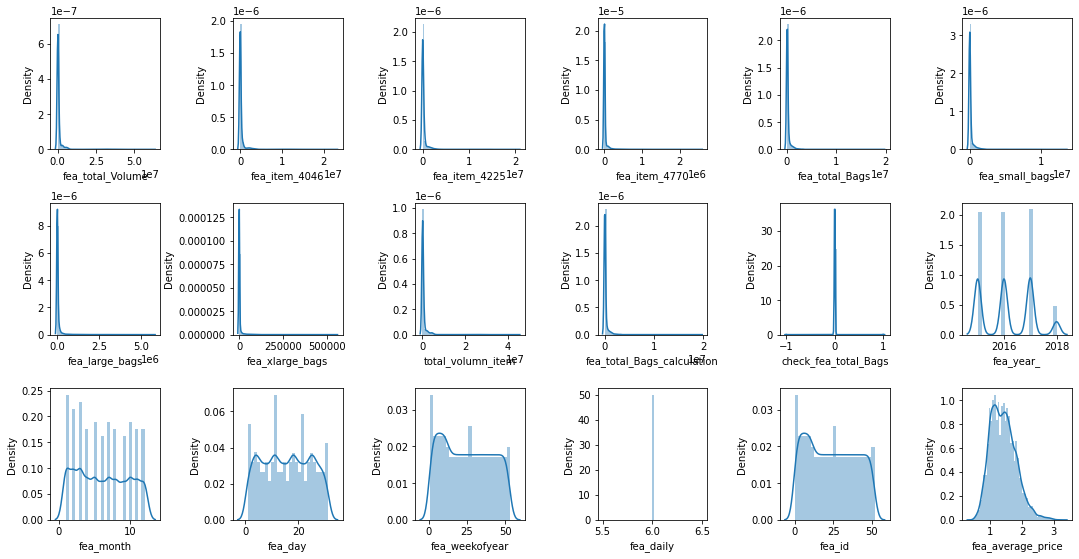

close


In [28]:
# Hiện thị dữ liệu
pre.displotChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious,a=4,b=6)

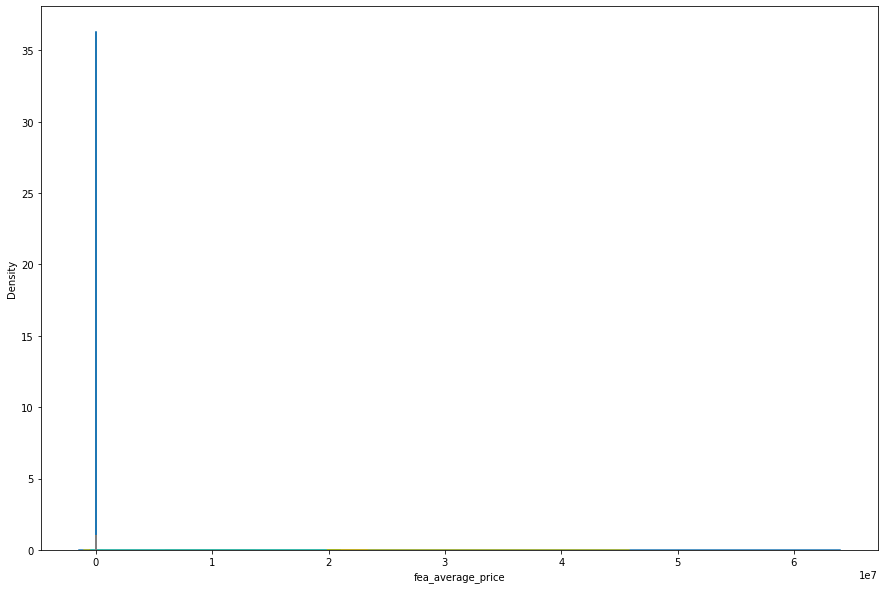

close


In [29]:
pre.subplotsChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious)

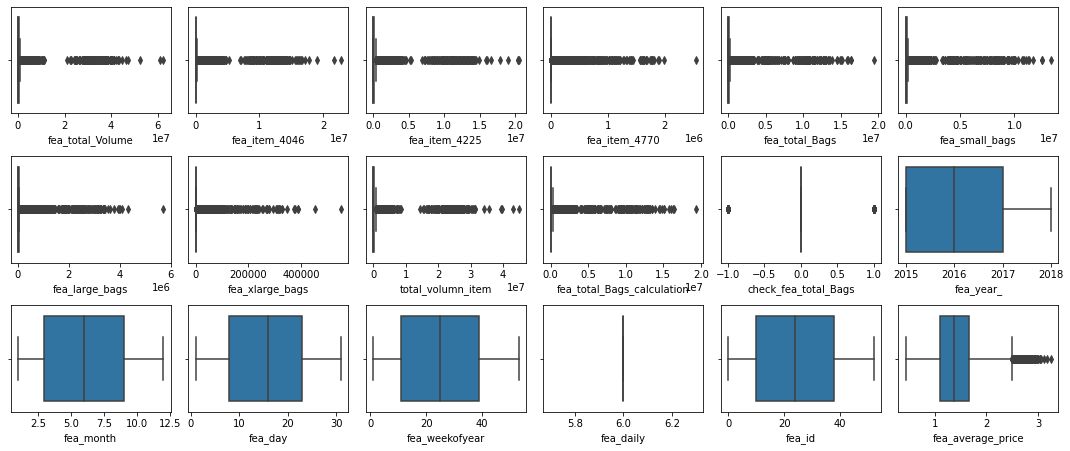

close


In [30]:
pre.boxplotChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious,a=4,b=6)

In [31]:
pre.filterOutlier(df=data_pre_processing,lst_input=lst_input_number_continious, lst_output=lst_output_continious)

close


,name_feature,IQR,Q1,Q3,cận dưới,cận trên,number_total_oulier,outliers_per_%,count,min,...,range,mean,median,mode,std,var,kurtosis,text_kurtosis,skew,text_skew
0,fea_average_price,0.56,1.10,1.66,0,209,209,1.15,18249,0.40,...,2.80,1.40,1.40,1.20,0.40,0.20,0.30,Lệch phải,0.60,Nhọn
1,fea_total_Volume,422123.71,10838.58,432962.29,0,2297,2297,12.59,18249,84.60,...,62505561.90,850644.00,107376.80,2039.00,3453545.40,11926975521801.30,92.10,Lệch phải,9.00,Nhọn
2,fea_item_4046,110166.13,854.07,111020.20,0,2518,2518,13.80,18249,0.00,...,22743616.20,293008.40,8645.30,0.00,1264989.10,1600197376979.00,86.80,Lệch phải,8.60,Nhọn
3,fea_item_4225,147198.08,3008.78,150206.86,0,2519,2519,13.80,18249,0.00,...,20470572.60,295154.60,29061.00,0.00,1204120.40,1449905940429.60,91.90,Lệch phải,8.90,Nhọn
4,fea_item_4770,6243.42,0.00,6243.42,0,2918,2918,15.99,18249,0.00,...,2546439.10,22839.70,185.00,0.00,107464.10,11548526004.70,132.50,Lệch phải,10.20,Nhọn
5,fea_total_Bags,105694.73,5088.64,110783.37,0,2533,2533,13.88,18249,0.00,...,19373134.40,239639.20,39743.80,0.00,986242.40,972674070012.10,112.20,Lệch phải,9.80,Nhọn
6,fea_small_bags,80488.25,2849.42,83337.67,0,2407,2407,13.19,18249,0.00,...,13384586.80,182194.70,26362.80,0.00,746178.50,556782376190.60,107.00,Lệch phải,9.50,Nhọn
7,fea_large_bags,21901.78,127.47,22029.25,0,2707,2707,14.83,18249,0.00,...,5719096.60,54338.10,2647.70,0.00,243966.00,59519391857.50,118.00,Lệch phải,9.80,Nhọn
8,fea_xlarge_bags,132.50,0.00,132.50,0,4014,4014,22.00,18249,0.00,...,551693.60,3106.40,0.00,0.00,17692.90,313038521.20,233.50,Lệch phải,13.10,Nhọn
9,total_volumn_item,302828.87,4972.72,307801.59,0,2350,2350,12.88,18249,2.00,...,44736158.80,611002.70,58195.40,18.80,2517798.90,6339311243571.70,92.30,Lệch phải,9.00,Nhọn


#### Nhận xét
1. Đối với biến output:
    - Range: chêch lệch quá lớn, dữ liệu lệch phải và nhọn
    - outlier ít
2. Đối với biến input:
    - Range: chêch các thuộc tính quá lớn,  dữ liệu lệch phải và nhọn
    - outlier quá nhiều >= 12%
3. Phải chọn model
    - Đối với dữ liệu thế này cần xem xét chọn model phù hợp hoặc phân cụm thêm cho dữ liệu cho phù hợp hơn

#### 1.1.5. Các chỉ số mô tả thuộc tính output và input của loại dữ liệu phân loại
1. Mức độ tần suất biến phân loại
2. Mức độ cân bằng dữ liệu của các biến phân loại =>xem mức độ các biên, count các phần tử

In [32]:
pre.summaryCategorical(df=data_pre_processing, lst_category_number=lst_input_numbers_categorical , lst_category_object=lst_input_object_categorical, \
    columns = ['feature','Số phân tử'])

- Mô tả biến  fea_type : 2 giá trị
conventional    9126
organic         9123
Name: fea_type, dtype: int64
- Mô tả biến  fea_region : 54 giá trị
MiamiFtLauderdale      338
Houston                338
SouthCentral           338
RichmondNorfolk        338
StLouis                338
SouthCarolina          338
Detroit                338
RaleighGreensboro      338
Plains                 338
Tampa                  338
NewYork                338
Chicago                338
Orlando                338
California             338
Southeast              338
West                   338
Sacramento             338
Boston                 338
BuffaloRochester       338
LosAngeles             338
SanFrancisco           338
HarrisburgScranton     338
LasVegas               338
Denver                 338
Columbus               338
Midsouth               338
BaltimoreWashington    338
HartfordSpringfield    338
GreatLakes             338
Pittsburgh             338
Albany                 338
SanDiego           

,feature,Số phân tử
0,fea_type,2
1,fea_region,54


In [33]:
data_pre_processing.tail()

,fea_id,fea_date,fea_month,fea_day,fea_weekofyear,fea_daily,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,...,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region,total_volumn_item,fea_total_Bags_calculation,check_fea_total_Bags
18245,7,2018-02-04,2,4,5,6,1.63,17074.83,2046.96,1529.20,...,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico,3576.16,13498.67,0.00
18246,8,2018-01-28,1,28,4,6,1.71,13888.04,1191.70,3431.50,...,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico,4623.20,9264.84,0.00
18247,9,2018-01-21,1,21,3,6,1.87,13766.76,1191.92,2452.79,...,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico,4372.65,9394.11,0.00
18248,10,2018-01-14,1,14,2,6,1.93,16205.22,1527.63,2981.04,...,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico,5235.68,10969.54,0.00
18249,11,2018-01-07,1,7,1,6,1.62,17489.58,2894.77,2356.13,...,12014.15,11988.14,26.01,0.00,organic,2018,WestTexNewMexico,5475.43,12014.15,0.00


In [34]:
pre.categorical_value_counts(df=data_pre_processing, lst_categorical=['fea_type'])

close


,0
fea_type,
conventional,9126
organic,9123


### Nhận xét:
    - Thuộc tính continious: quá nhiều outlier có thể do giá bán khác nhau giữa 2 loại bơ
    - Dữ liệu đa số lệch phải
    - Cách tách ra 2 bộ dữ liệu outlier và không outlier
    - Thực hiện bước tiếp theo

### 1.2. Phân tích 2 biến (BI-variable analysis)
1. Mục đích phân tích 2 biến (BI-variable analysis)
    - Phân tích 2 biền làm gì ?
        - Tìm sự liên kết (association) và không liên kết (Disassociation)
            * Hai biến input có độc lập với nhau không ?
            * Hai biến input và output có phụ thuộc lãnh nhau không 
                - Có sự liên kết với nhau không ? 
                - Nếu phú thuộc thì quá tốt với model
            * Thực tế các biến input khó có thể độc lập với nhau 
                - Cần xem mức độ tương quan giữa các biến
            * Các biến input phụ thuộc nhau các ít càng tốt
            * Biến input luôn phải phụ thuộc với biến output thì mới có ý nghĩa
2. Biến liên tục với biến liên tục (Continuous vs Continuous)
    - Dùng biểu đồ phân tán
        * Đó là cách phù hợp để xem mối quan hệ 2 biến
        * Cho thấy mỗi quan hệ là tuyến tính hoặc phi tuyến tính
    - Dùng Correction
        * Tương quan khác nhau giữa -1 đến 1
        * Bé hơn 0.3 tương quan rời rác
        * Từ 0.3 đến 0.6 tương quan
        * Lớn hơn 0.6 tương quan mạnh mẽ
3. Hai biến phân loại (Categorical vs Categorical)
    - Step 1: Dùng two-way table
        - Bắt đầu phân tích mỗi quan hệ bằng cách tạo 2 chiều Count
        - Các dòng category theo các dòng khác nhau
    - Step 2: Stacked column chart - Trực quan hóa 2 cột chồng lên nhau
    - Step 3: Dùng Chi-square
        - Kiểm định 2 biến độc lập hay phụ thuộc
            * Thức đo giá trị thống kê: Statistic >= Critical value: Dữ liệu độc lập, ngược lại là dữ liệu phụ thuộc
            * Theo giá trị p-value: p-value <= alpha: 2 biến độc lập, ngược lại 2 biến phụ thuộc hoặc alpha = 1-prod trong đó thường prod: 0.95
4. Biến liên tục vs biến phân loại (Categorical vs Continuous) => Một trường hợp phức tạp
    - Trực quan hóa dữ liệu bằng boxlot
        * Với số lượng thuộc tính ít, không hiển thị ý nghĩa thống kê
    - Dùng ANOVA - để xem mức độ tương quan: aov_table[aov_table['PR(>F)'] < alpha] => Có tương quan với nhau 
5. Mục đích phân tích để làm gì ?
    - Thứ 1: Phát hiện missing value và outlier
    - Thứ 2: Chọn các thuộc tính categorical, continious phù hợp với bài toán
    - Thứ 3: Xem có thể thực các bước tiếp theo      

#### 1.2.1. Phân tích 2 biến liên tục/ Biến liên tục với biến liên tục (Continuous vs Continuous)
- Dùng biểu đồ phân tán
        * Đó là cách phù hợp để xem mối quan hệ 2 biến
        * Cho thấy mỗi quan hệ là tuyến tính hoặc phi tuyến tính
    - Dùng Correction
        * Tương quan khác nhau giữa -1 đến 1
        * Bé hơn 0.3 tương quan rời rác
        * Từ 0.3 đến 0.6 tương quan
        * Lớn hơn 0.6 tương quan mạnh mẽ
    - Dùng K-best

In [35]:
# Ma trận hệ số tương quan giữa các biến với nhau
pre.corr_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, lst_output_continious=lst_output_continious)

close


,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,total_volumn_item,fea_total_Bags_calculation,check_fea_total_Bags,fea_year_,fea_month,fea_day,fea_weekofyear,fea_daily,fea_id
fea_average_price,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,-0.20,-0.18,-0.00,0.09,0.16,0.03,0.15,NaN,-0.13
fea_total_Volume,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.99,0.96,0.01,0.02,-0.02,-0.01,-0.02,NaN,0.01
fea_item_4046,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.98,0.92,0.01,0.00,-0.03,-0.01,-0.03,NaN,0.02
fea_item_4225,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,0.98,0.91,0.00,-0.01,-0.02,-0.01,-0.02,NaN,0.02
fea_item_4770,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,0.89,0.79,0.00,-0.04,-0.03,-0.01,-0.03,NaN,0.04
fea_total_Bags,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.93,1.00,0.01,0.07,-0.02,-0.00,-0.02,NaN,-0.00
fea_small_bags,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.94,0.99,0.01,0.06,-0.02,-0.00,-0.02,NaN,0.00
fea_large_bags,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.84,0.94,0.01,0.09,-0.02,-0.01,-0.02,NaN,-0.01
fea_xlarge_bags,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.71,0.80,0.01,0.08,-0.01,0.00,-0.02,NaN,-0.01
total_volumn_item,-0.20,0.99,0.98,0.98,0.89,0.93,0.94,0.84,0.71,1.00,0.93,0.01,-0.00,-0.02,-0.01,-0.02,NaN,0.02


In [36]:
# Trực quan hóa dữ liệu
#pre.pairplot_chart(df=data_pre_processing, lst_continious=lst_input_number_continious)

In [37]:
# Trực quan hóa dữ liệu
# pre.pairplot_chart(df=data_pre_processing, lst_continious=lst_output_continious)

In [38]:
lst_output_continious

['fea_average_price']

In [39]:
# Biến inputs liên tục với biến output liên tục: Dùng để xem mực độ tương quan của biến output và output
# ['amount_billion_new','amount_calculation','amount_calculation_new','price_house_billion']
pre.correlate_output_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, feature_output_continious='fea_average_price',\
     strong=0.6, correlate=0.3)

close


,correlate,Variable_output,Variable_input,corr
0,weak,fea_average_price,fea_total_Volume,0.19
1,weak,fea_average_price,fea_item_4046,0.21
2,weak,fea_average_price,fea_item_4225,0.17
3,weak,fea_average_price,fea_item_4770,0.18
4,weak,fea_average_price,fea_total_Bags,0.18
5,weak,fea_average_price,fea_small_bags,0.17
6,weak,fea_average_price,fea_large_bags,0.17
7,weak,fea_average_price,fea_xlarge_bags,0.12
8,weak,fea_average_price,total_volumn_item,0.20
9,weak,fea_average_price,fea_total_Bags_calculation,0.18


In [40]:
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='strong')

close


,correlate,Variable_input1,Variable_input2,corr
0,strong,fea_item_4046,fea_total_Volume,0.98
1,strong,fea_item_4225,fea_total_Volume,0.97
2,strong,fea_total_Bags,fea_total_Volume,0.96
3,strong,fea_small_bags,fea_total_Volume,0.97
4,strong,total_volumn_item,fea_total_Volume,0.99
5,strong,fea_total_Bags_calculation,fea_total_Volume,0.96
6,strong,fea_item_4225,fea_item_4046,0.93
7,strong,fea_total_Bags,fea_item_4046,0.92
8,strong,fea_small_bags,fea_item_4046,0.93
9,strong,total_volumn_item,fea_item_4046,0.98


In [41]:
# medium: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='medium')

close


,correlate,Variable_input1,Variable_input2,corr
0,medium,fea_item_4770,fea_total_Volume,0.87
1,medium,fea_large_bags,fea_total_Volume,0.88
2,medium,fea_xlarge_bags,fea_total_Volume,0.75
3,medium,fea_item_4770,fea_item_4046,0.83
4,medium,fea_large_bags,fea_item_4046,0.84
5,medium,fea_xlarge_bags,fea_item_4046,0.70
6,medium,fea_item_4770,fea_item_4225,0.89
7,medium,fea_large_bags,fea_item_4225,0.81
8,medium,fea_xlarge_bags,fea_item_4225,0.69
9,medium,fea_total_Bags,fea_item_4770,0.79


In [42]:
# correlate: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='correlate')

close


,correlate,Variable_input1,Variable_input2,corr


In [43]:
# weak: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='weak')

close


,correlate,Variable_input1,Variable_input2,corr
0,weak,check_fea_total_Bags,fea_total_Volume,0.01
1,weak,fea_year_,fea_total_Volume,0.02
2,weak,fea_month,fea_total_Volume,0.02
3,weak,fea_day,fea_total_Volume,0.01
4,weak,fea_weekofyear,fea_total_Volume,0.02
...,...,...,...,...
83,weak,fea_weekofyear,fea_day,0.03
84,weak,fea_daily,fea_day,NaN
85,weak,fea_id,fea_day,0.09
86,weak,fea_daily,fea_weekofyear,NaN


#### Nhận xét:
1. Trường hợp đa cộng tuyến
- Output vs input tương quan dữ liệu quá yếu cần xem cách chia như thế nào cho hợp lý
- Loại bỏ những thuộc tính input có tính phụ thuộc với nhau cao như strong and medium

#### 1.2.2. Phân tích biến liên tục/ Biến phân loại (continious & Categorical)
- Step 1: Dùng two-way table
    - Bắt đầu phân tích mỗi quan hệ bằng cách tạo 2 chiều Count
    - Các dòng category theo các dòng khác nhau
- Step 2: Stacked column chart - Trực quan hóa 2 cột chồng lên nhau
- Step 3: Dùng Chi-square
    - Kiểm định 2 biến độc lập hay phụ thuộc
        * Thức đo giá trị thống kê: Statistic >= Critical value: Dữ liệu độc lập, ngược lại là dữ liệu phụ thuộc
        * Theo giá trị p-value: p-value <= alpha: 2 biến độc lập, ngược lại 2 biến phụ thuộc hoặc alpha = 1-prod trong đó thường prod: 0.95

In [44]:
lst_input_numbers_categorical, lst_input_object_categorical, lst_input_number_continious, lst_output_continious

([],
 ['fea_type', 'fea_region'],
 ['fea_total_Volume',
  'fea_item_4046',
  'fea_item_4225',
  'fea_item_4770',
  'fea_total_Bags',
  'fea_small_bags',
  'fea_large_bags',
  'fea_xlarge_bags',
  'total_volumn_item',
  'fea_total_Bags_calculation',
  'check_fea_total_Bags',
  'fea_year_',
  'fea_month',
  'fea_day',
  'fea_weekofyear',
  'fea_daily',
  'fea_id'],
 ['fea_average_price'])

In [45]:
pre.correlate_input_variable_continious_inputCategorical(df=data_pre_processing, lst_categorical=lst_input_object_categorical,\
     lst_continious=lst_output_continious+lst_input_number_continious, choose="matrix")

close


,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,total_volumn_item,fea_total_Bags_calculation,check_fea_total_Bags,fea_year_,fea_month,fea_day,fea_weekofyear,fea_daily,fea_id
C(fea_region),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
C(fea_type),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN


In [46]:
pre.correlate_input_variable_continious_inputCategorical(df=data_pre_processing, lst_categorical=lst_input_object_categorical,\
     lst_continious=lst_output_continious, choose="matrix")

close


,fea_average_price
C(fea_type),0.00
C(fea_region),0.00


#### Nhận xét
1. Những thuộc tính phụ thuộc biến output là những biến như pháp lý, nội dung viết, và đã bán hay chưa bán
2. Xây dựng 1 hàm tốt hơn để phân tích thêm yếu tố này

#### 1.2.2. Biến liên tục vs biến phân loại (Categorical vs categorical)

In [47]:
lst_categorical = lst_input_numbers_categorical + lst_input_object_categorical
pre.correlate_2_variable_categorical(df=data_pre_processing, lst_categorical=lst_categorical, choose="dependent")

close


,Tuong_quan,Variable_input1,Variable_input2


#### Nhận xét:
1. Cần loại bỏ những trường hợp phụ thuộc nhau ra với các biến input đa công tuyến

## C. DATA ANALYSIS
- Mục tiêu của việc phân tích này:
    1. Gán nhãn cho dữ liệu
    2. Tìm những thuộc tính tốt cho bài toán
    3. Xây dựng bộ feature cho bài toán

### 1.0. Lựa chọn lại feature cho phù hợp bài toán

In [48]:
# Dự đoán kiểu dữ liệu của thuộc tính theo các cập bậc input/ output và continious/ categorical
# Biến liên tục
lst_input_number_continious = ['fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags', 'fea_year_', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id' ]
# Biến phân loại
lst_input_numbers_categorical = []
lst_input_object_categorical = ['fea_type', 'fea_region',]
lst_input_object_text = []
lst_input_date = ['fea_date']
# Biến categorical 
lst_output_categorical = []
# Biến liên tục - continious
lst_output_continious = ['fea_average_price']

In [49]:
# Trường hợp 1: Lấy toán bồ dữ liệu
lst_variable = lst_output_continious + lst_input_date + lst_input_object_categorical + lst_input_numbers_categorical + lst_input_number_continious +lst_input_object_text
data_analysis_all = data_pre_processing[lst_variable]

In [50]:
data_analysis_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fea_average_price           18249 non-null  float64       
 1   fea_date                    18249 non-null  datetime64[ns]
 2   fea_type                    18249 non-null  object        
 3   fea_region                  18249 non-null  object        
 4   fea_total_Volume            18249 non-null  float64       
 5   fea_item_4046               18249 non-null  float64       
 6   fea_item_4225               18249 non-null  float64       
 7   fea_item_4770               18249 non-null  float64       
 8   fea_total_Bags              18249 non-null  float64       
 9   fea_small_bags              18249 non-null  float64       
 10  fea_large_bags              18249 non-null  float64       
 11  fea_xlarge_bags             18249 non-null  float64   

### 1.1. Phân tích biến target variable

In [51]:
# Chọn thuộc tính
features_choose = []

#### 1.1.1. Thuộc tính target
- Biến Y là: fea_average_price
- Biến X là: xem các biến còn lại

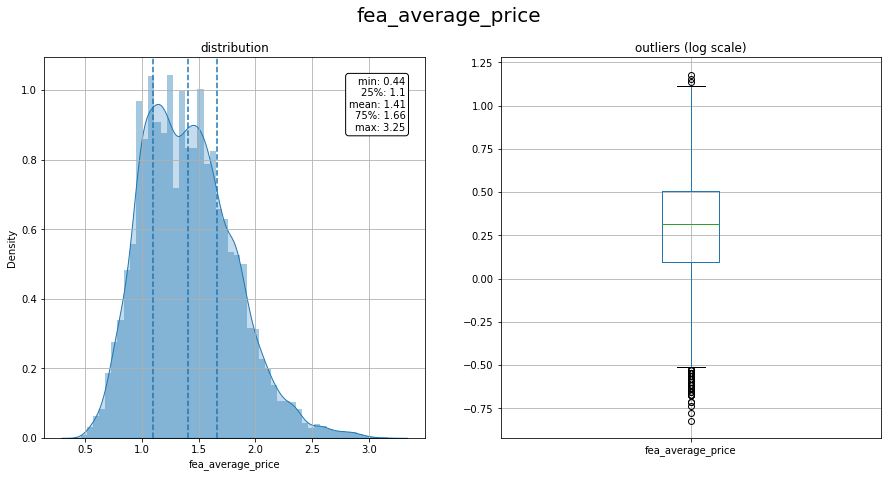

In [52]:
# Hàm xem thực hiện tính outlier của biến y => Có rất nhiều giá trị outlier ở phần trên
pre.freqdist_plot(data_analysis_all, "fea_average_price", box_logscale=True, figsize=(15,7))

In [53]:
features_choose.append('fea_average_price')

#### Nhận xét:
- Biến fea_average_price các giá trị chêch lệch lớn giữa min, max, và mean
- Outler trên dưới đều cao sau khi log

#### 1.1.2. Thuộc tính input

In [54]:
# Column input
data_analysis_all.columns

Index(['fea_average_price', 'fea_date', 'fea_type', 'fea_region',
       'fea_total_Volume', 'fea_item_4046', 'fea_item_4225', 'fea_item_4770',
       'fea_total_Bags', 'fea_small_bags', 'fea_large_bags', 'fea_xlarge_bags',
       'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags', 'fea_year_', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_id'],
      dtype='object')

#### 1.1.2.1. fea_date

--- WARNING: Factorizing 2 labels of fea_type ---
--- WARNING: Factorizing 54 labels of fea_region ---


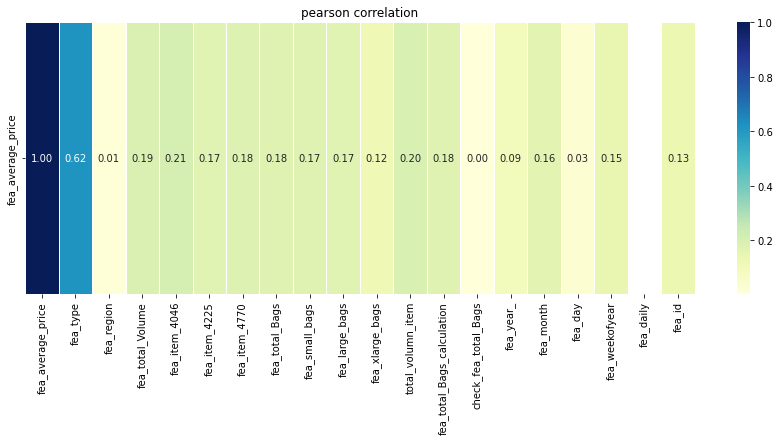

In [55]:
corr = pre.corr_matrix(data_analysis_all, method="pearson", negative=False, lst_filters=["fea_average_price"], figsize=(15,5))

#### Nhận xét: 
- Có 2 dữ liệu chưa gán nhãn
- Chỉ có feature fea_type: mới có dữ liệu gần correct với dữ liệu

##### 1.1.2. Chọn thuộc tính input
- Thuộc tính categorical
    - lst_input_categorical_all = ['fea_year_', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id', 'fea_type', 'fea_region']
- Thuộc tính continious
    - lst_input_continious_all = ['fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item']
- Thuộc tính date:
    - lst_input_date = ['fea_date']

##### 1.1.2.1. Chọn thuộc tính input categorical

In [56]:
lst_input_categorical_all = ['fea_type', 'fea_region']

In [57]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_average_price',max_cat=20)

'num'

#### Nhận xét:
- Biến input là biến continious

##### 1.1.2.1.1. fea_type

In [58]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_type',max_cat=20)

'cat'

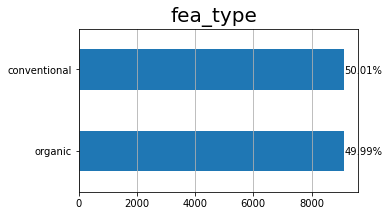

(Text(0.5, 0.98, 'fea_type'), None)

In [59]:
pre.freqdist_plot(data_analysis_all, "fea_type", figsize=(5,3))

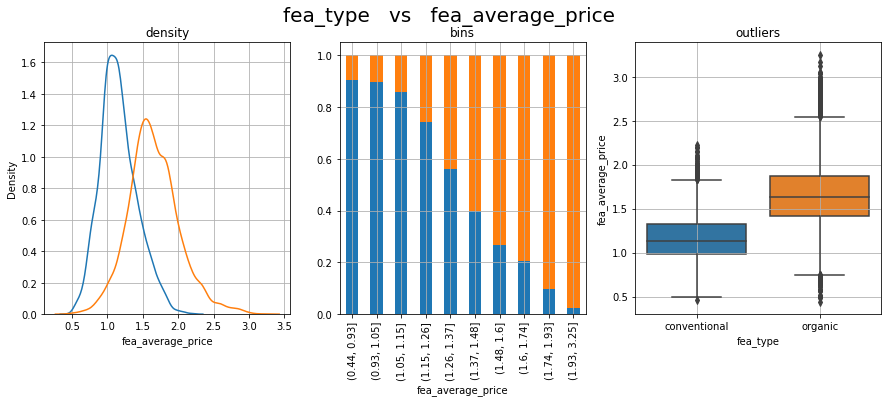

In [60]:
pre.bivariate_plot(data_analysis_all, x="fea_type", y="fea_average_price", figsize=(15,5))

In [61]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features_choose.append("fea_type")

##### Nhận xét:
- type: giá giữa organic và vô cơ chật lệch rất nhiều

##### 1.1.2.1.2. fea_region

In [62]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_region',max_cat=20)

'cat'

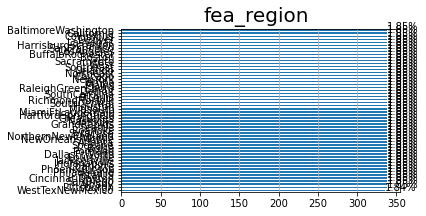

(Text(0.5, 0.98, 'fea_region'), None)

In [63]:
pre.freqdist_plot(data_analysis_all, "fea_region", figsize=(5,3))

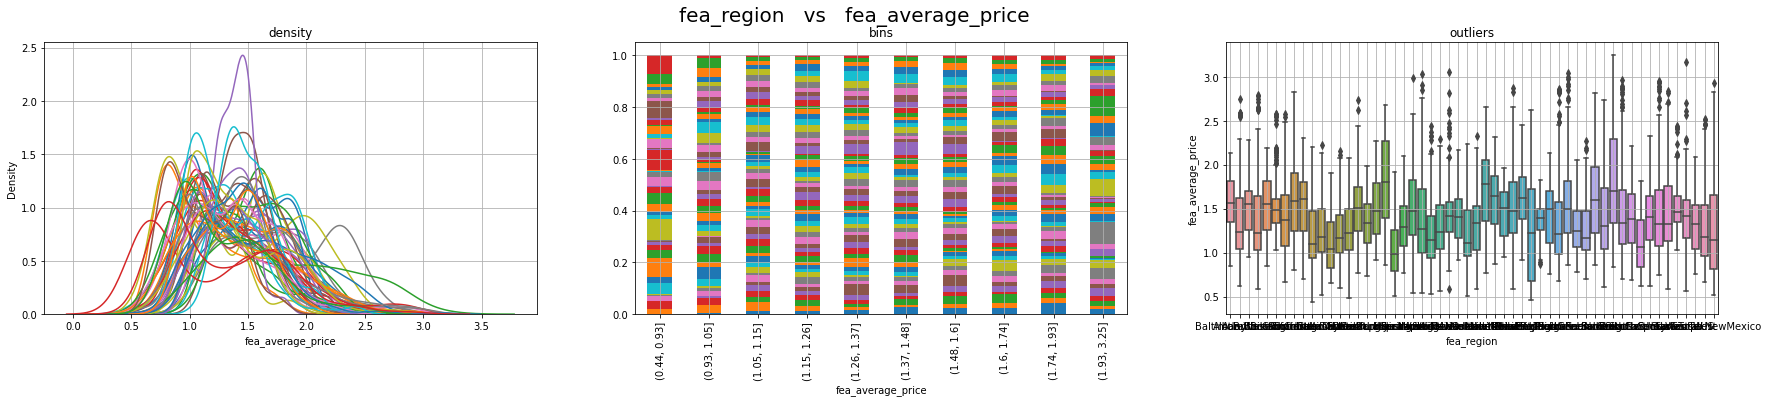

In [64]:
pre.bivariate_plot(data_analysis_all, x="fea_region", y="fea_average_price", figsize=(30,5))

In [65]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features_choose.append("fea_region")

##### Nhận xét: 
- Giá càng vung rất biến động sẽ dẫn đến bái toán bị sai

##### 1.1.2.1. Chọn thuộc tính input categorical

In [66]:
lst_input_number_continious = ['fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item', 'fea_total_Bags_calculation',
       'check_fea_total_Bags', 'fea_year_', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id' ]

##### 1.1.2.1.1. fea_total_Volume

In [67]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_total_Volume',max_cat=20)

'num'

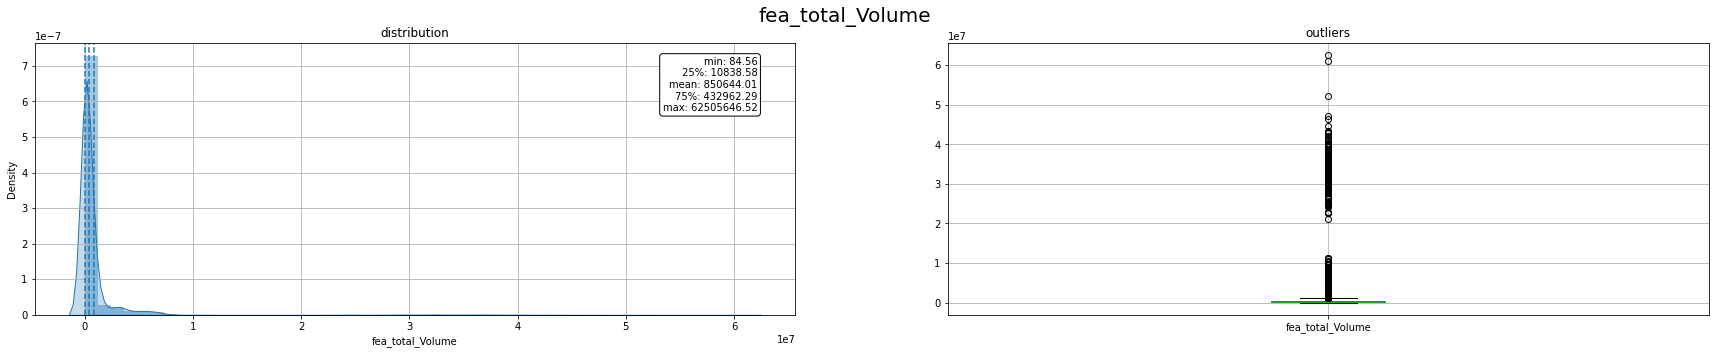

In [68]:
pre.freqdist_plot(data_analysis_all, "fea_total_Volume", figsize=(30,5))

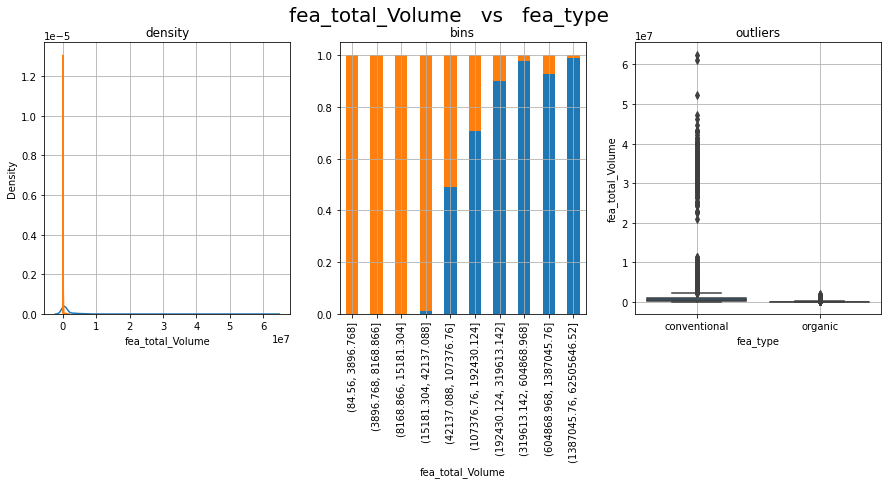

In [69]:
pre.bivariate_plot(data_analysis_all, x="fea_total_Volume", y="fea_type", figsize=(15,5))

In [70]:
features_choose.append('fea_total_Volume')

##### Nhận xét:
- Những khu vực khác nhau sẽ có sản lượng bơ khác nhau cho từng khu vực
- Cho nên cần phải phân tách lượng bơ từng khu vức thế nào?

##### 1.1.2.1.2. fea_item_4046

In [71]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_item_4046',max_cat=20)

'num'

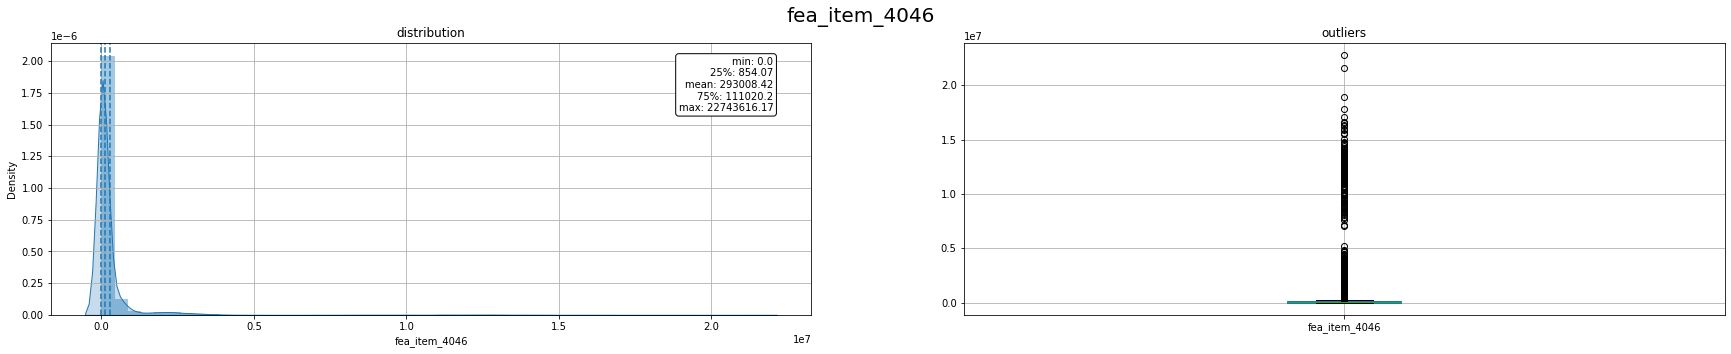

In [72]:
pre.freqdist_plot(data_analysis_all, "fea_item_4046", figsize=(30,5))

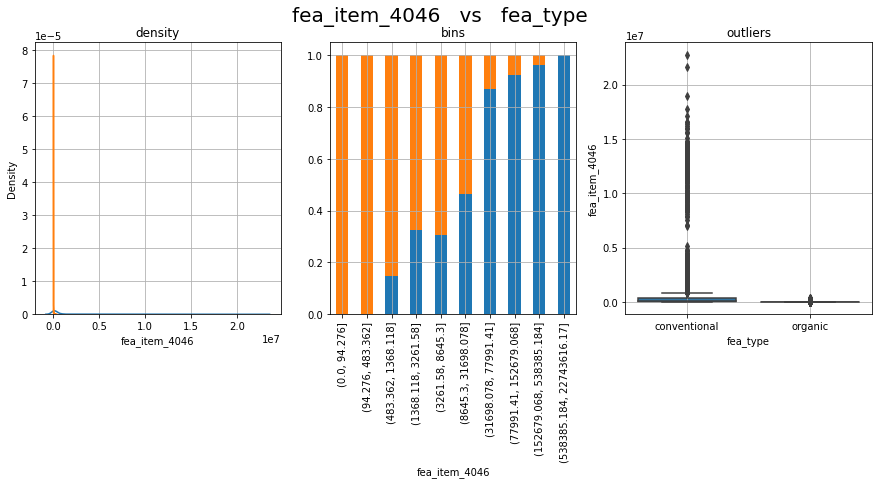

In [73]:
pre.bivariate_plot(data_analysis_all, x="fea_item_4046", y="fea_type", figsize=(15,5))

In [74]:
features_choose.append('fea_item_4046')

##### Nhận xét:
- Outlier quá nhiều cần xem lại outler từng vùng và từng type

##### 1.1.2.1.3. fea_item_4225

In [75]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_item_4225',max_cat=20)

'num'

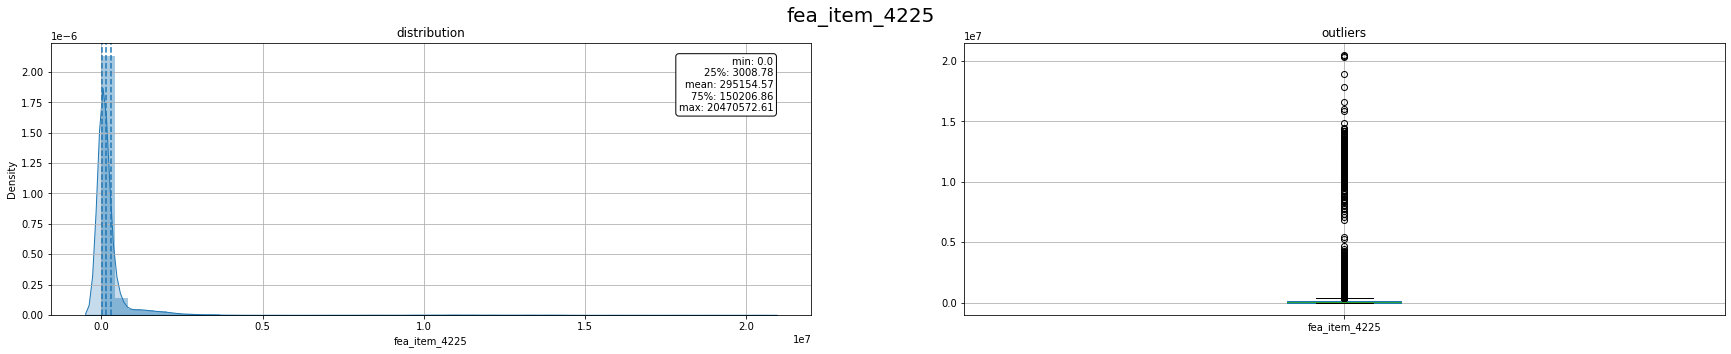

In [76]:
pre.freqdist_plot(data_analysis_all, "fea_item_4225", figsize=(30,5))

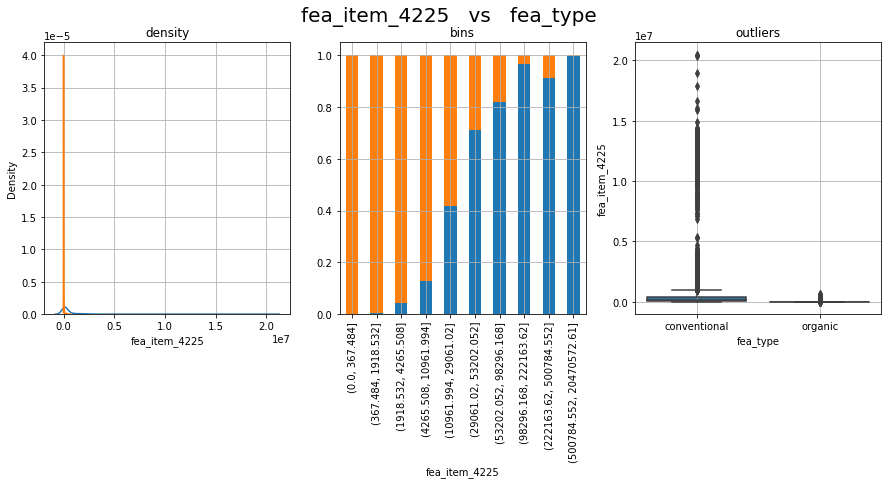

In [77]:
pre.bivariate_plot(data_analysis_all, x="fea_item_4225", y="fea_type", figsize=(15,5))

In [78]:
features_choose.append('fea_item_4225')

##### Nhận xét:
- Outlier quá nhiều cần xem lại outler từng vùng và từng type

##### 1.1.2.1.4. fea_item_4770

In [79]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_item_4770',max_cat=20)

'num'

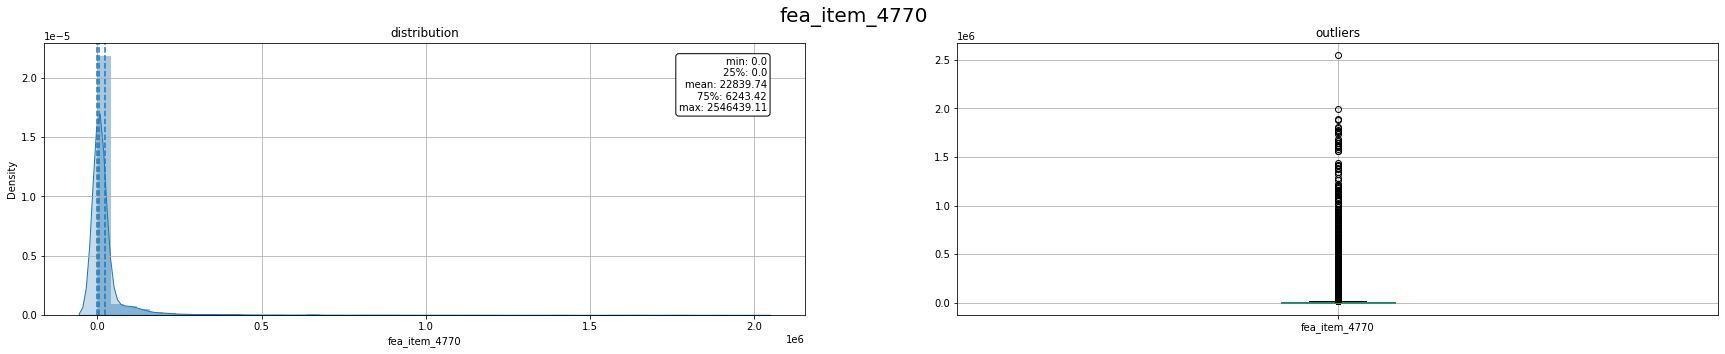

In [80]:
pre.freqdist_plot(data_analysis_all, "fea_item_4770", figsize=(30,5))

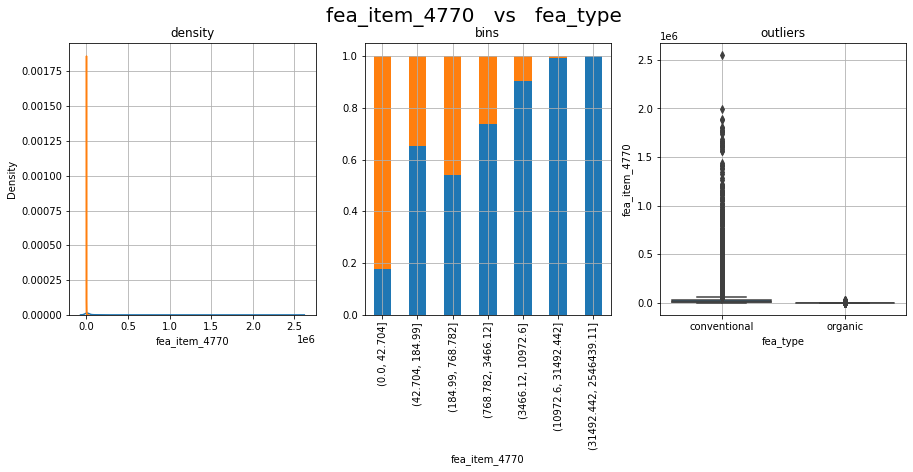

In [81]:
pre.bivariate_plot(data_analysis_all, x="fea_item_4770", y="fea_type", figsize=(15,5))

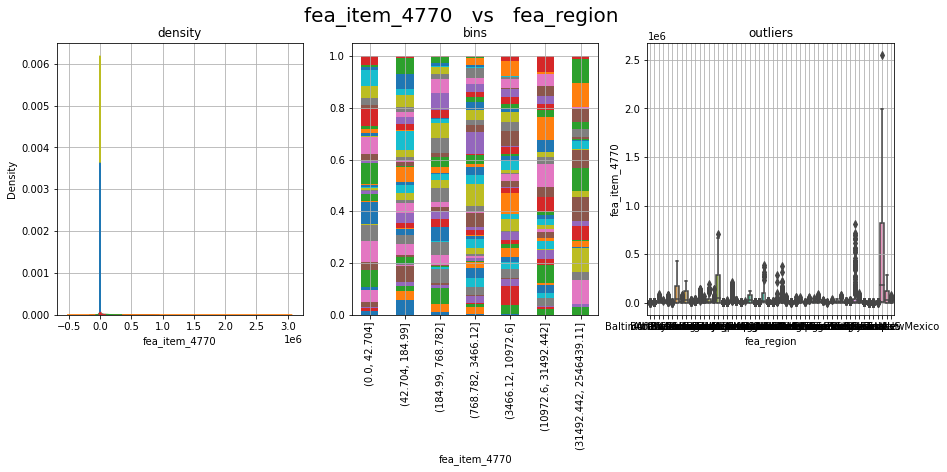

In [82]:

pre.bivariate_plot(data_analysis_all, x="fea_item_4770", y="fea_region", figsize=(15,5))

In [83]:
features_choose.append('fea_item_4770')

##### 1.1.2.1.5. fea_total_Bags

In [84]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_total_Bags',max_cat=20)

'num'

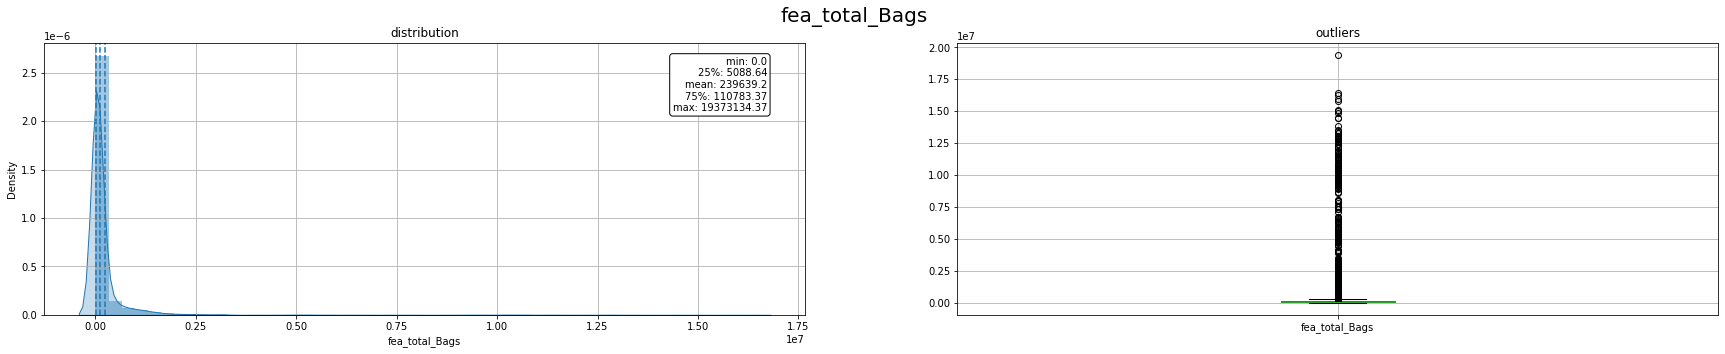

In [85]:
pre.freqdist_plot(data_analysis_all, "fea_total_Bags", figsize=(30,5))

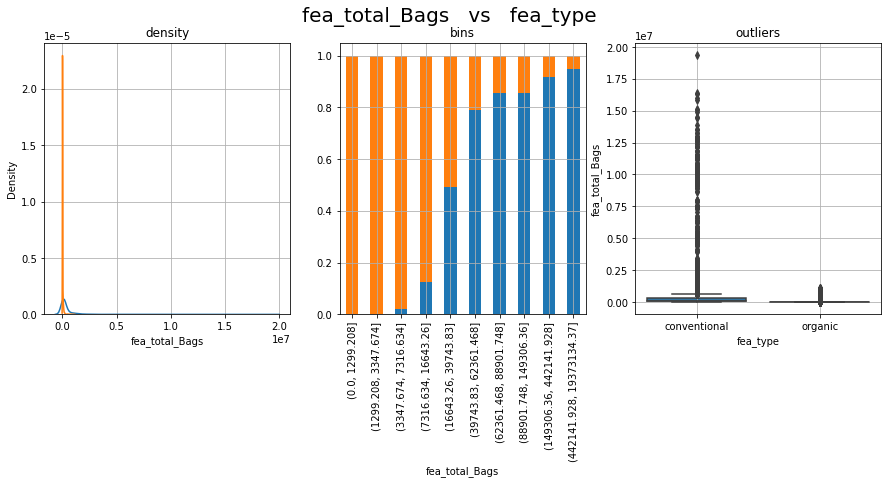

In [86]:
pre.bivariate_plot(data_analysis_all, x="fea_total_Bags", y="fea_type", figsize=(15,5))

In [87]:
#pre.bivariate_plot(data_analysis_all, x="fea_total_Bags", y="fea_average_price", figsize=(15,5))

In [88]:
features_choose.append('fea_total_Bags')

##### 1.1.2.1.6. fea_small_bags

In [89]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_small_bags',max_cat=20)

'num'

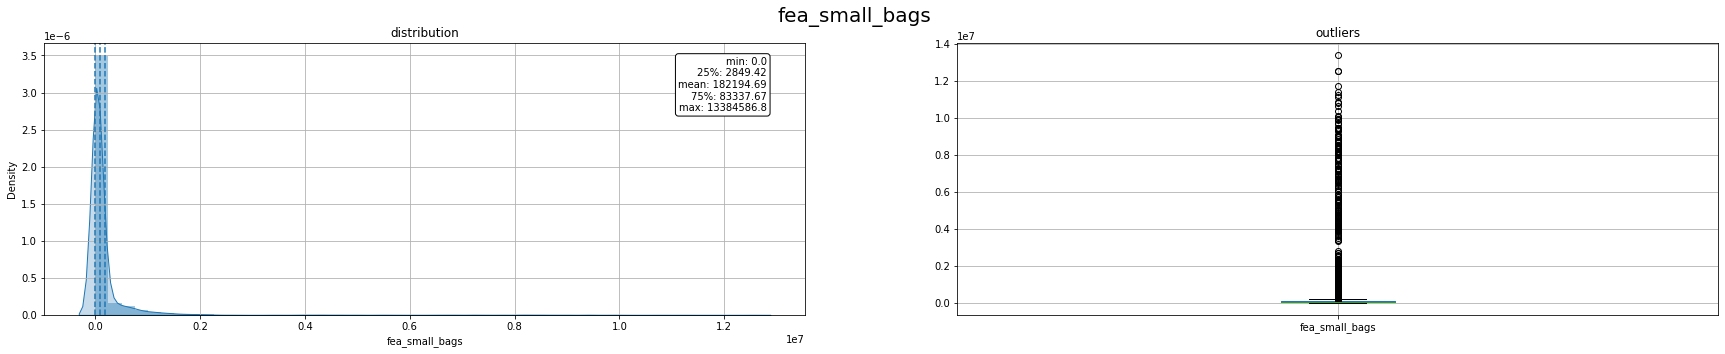

In [90]:
pre.freqdist_plot(data_analysis_all, "fea_small_bags", figsize=(30,5))

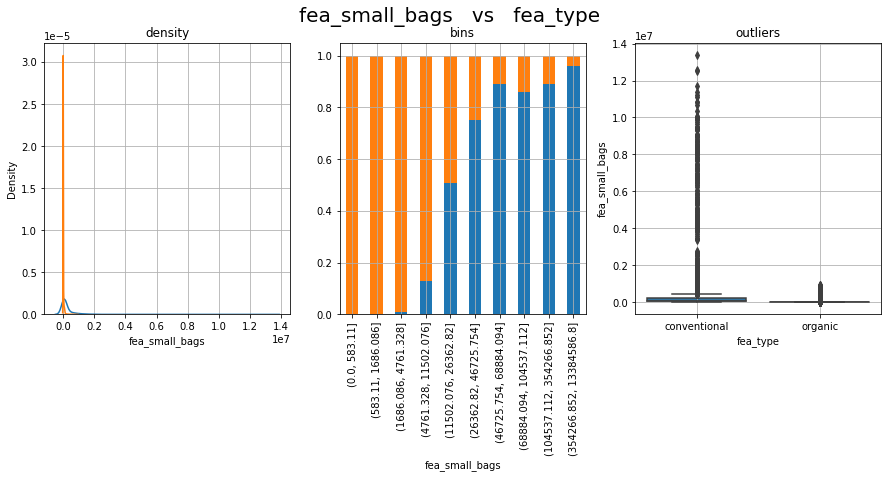

In [91]:
pre.bivariate_plot(data_analysis_all, x="fea_small_bags", y="fea_type", figsize=(15,5))

In [92]:
#pre.bivariate_plot(data_analysis_all, x="fea_small_bags", y="fea_average_price", figsize=(15,5))

In [93]:
features_choose.append('fea_small_bags')

##### 1.1.2.1.7. fea_large_bags

In [94]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_large_bags',max_cat=20)

'num'

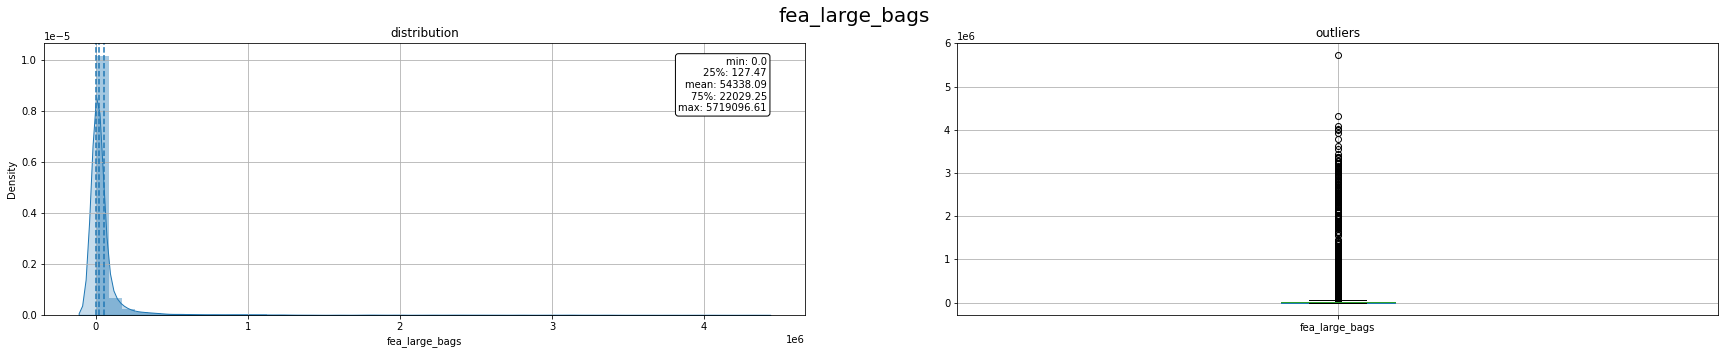

In [95]:
pre.freqdist_plot(data_analysis_all, "fea_large_bags", figsize=(30,5))

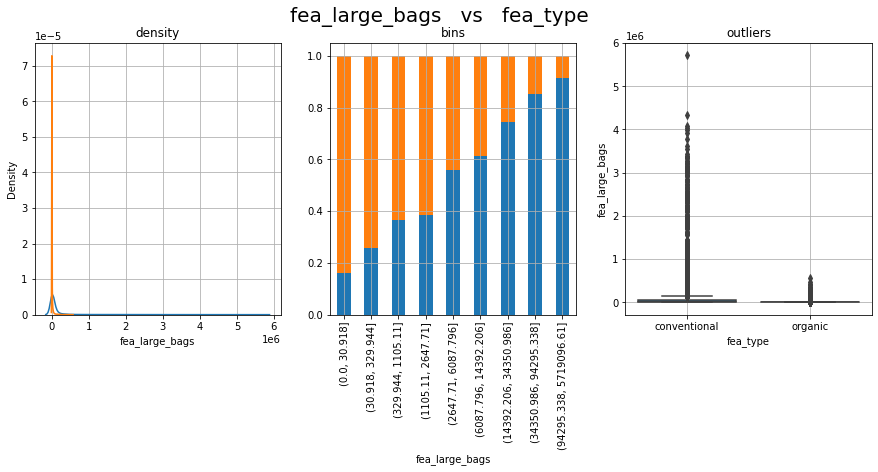

In [96]:
pre.bivariate_plot(data_analysis_all, x="fea_large_bags", y="fea_type", figsize=(15,5))

In [97]:
#pre.bivariate_plot(data_analysis_all, x="fea_small_bags", y="fea_average_price", figsize=(15,5))

In [98]:
features_choose.append('fea_large_bags')

##### 1.1.2.1.8. fea_xlarge_bags

In [99]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_xlarge_bags',max_cat=20)

'num'

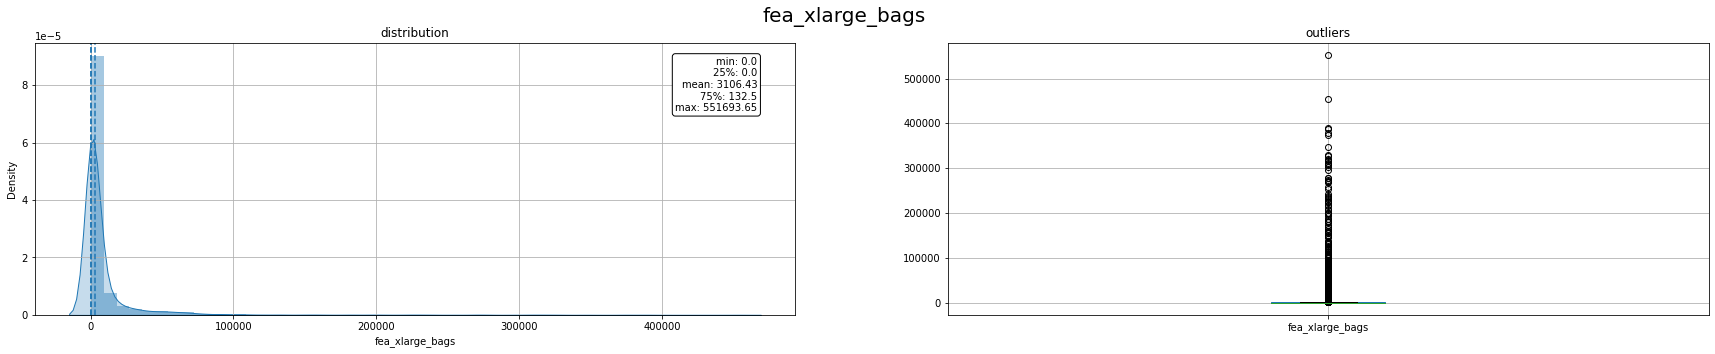

In [100]:
pre.freqdist_plot(data_analysis_all, "fea_xlarge_bags", figsize=(30,5))

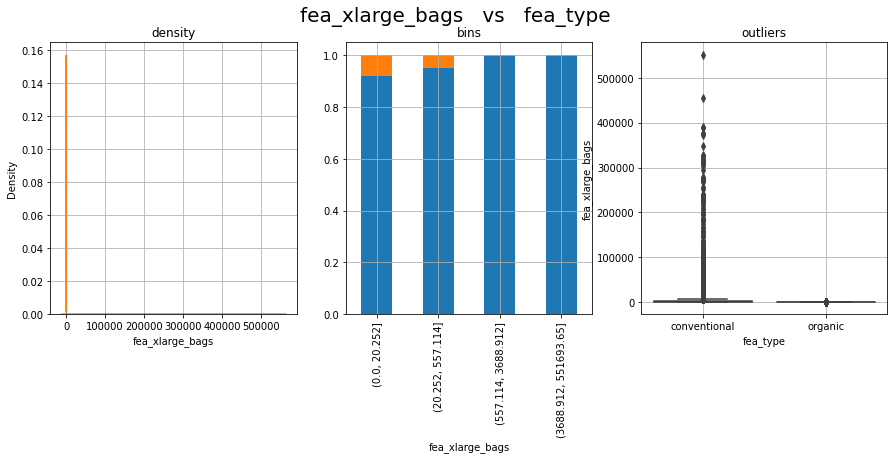

In [101]:
pre.bivariate_plot(data_analysis_all, x="fea_xlarge_bags", y="fea_type", figsize=(15,5))

In [102]:
#pre.bivariate_plot(data_analysis_all, x="fea_xlarge_bags", y="fea_average_price", figsize=(15,5))

In [103]:
features_choose.append('fea_xlarge_bags')

##### 1.1.2.1.9. total_volumn_item

In [104]:
pre.utils_recognize_type(dtf=data_analysis_all, col='total_volumn_item',max_cat=20)


'num'

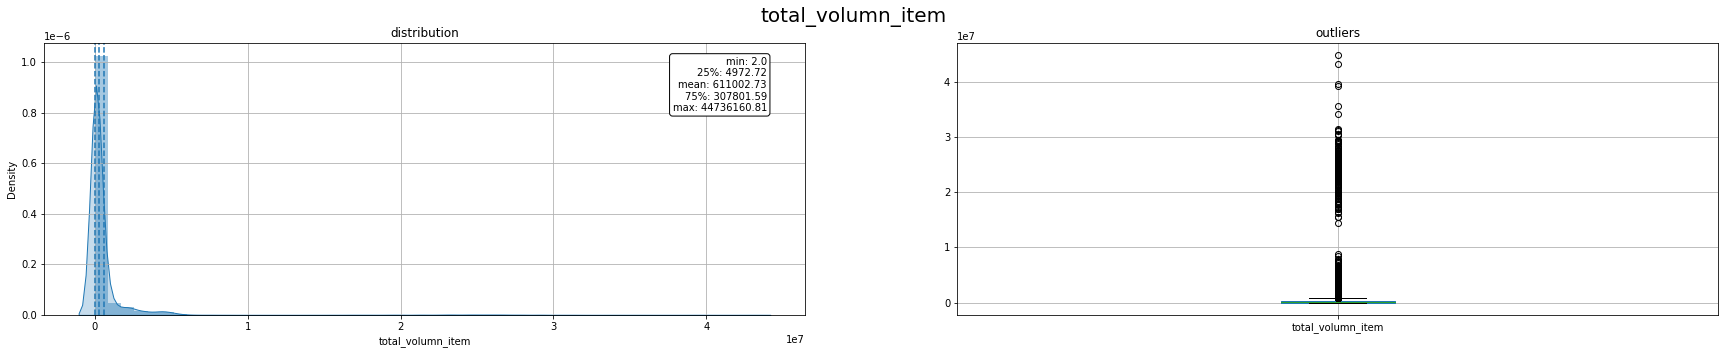

In [105]:
pre.freqdist_plot(data_analysis_all, "total_volumn_item", figsize=(30,5))


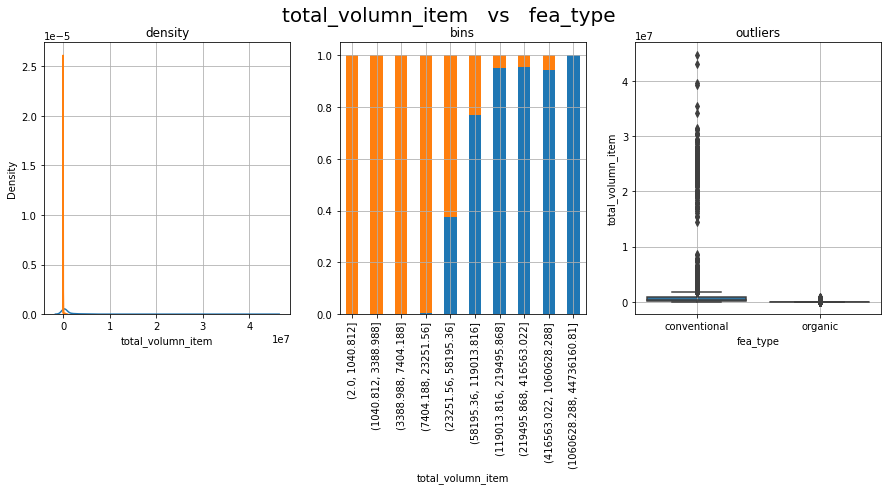

In [106]:
pre.bivariate_plot(data_analysis_all, x="total_volumn_item", y="fea_type", figsize=(15,5))


In [107]:
#pre.bivariate_plot(data_analysis_all, x="total_volumn_item", y="fea_average_price", figsize=(15,5))


In [108]:
features_choose.append('total_volumn_item')

##### 1.1.2.1.10. fea_total_Bags_calculation

In [109]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_total_Bags_calculation',max_cat=20)


'num'

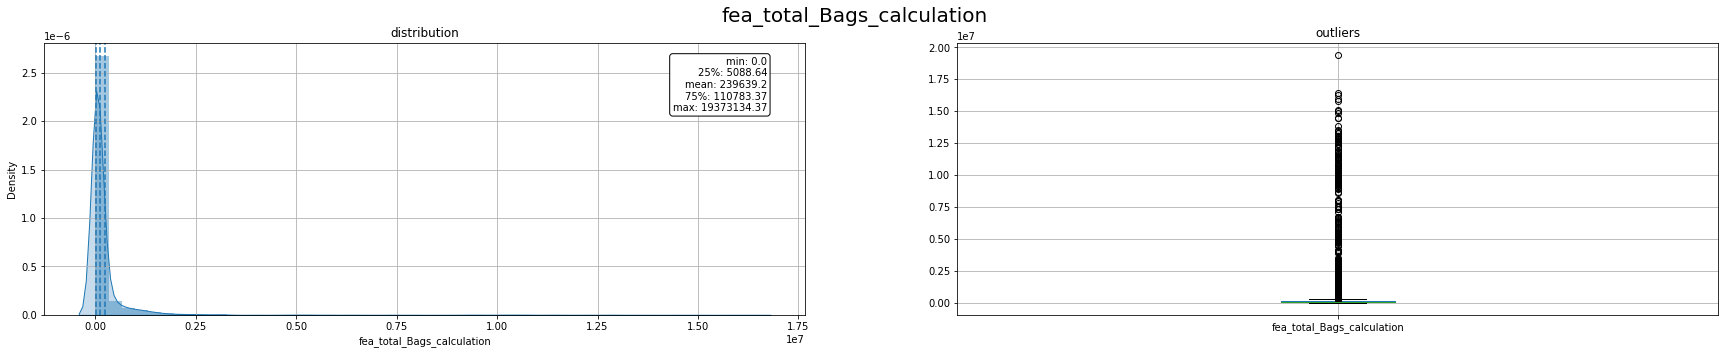

In [110]:
pre.freqdist_plot(data_analysis_all, "fea_total_Bags_calculation", figsize=(30,5))


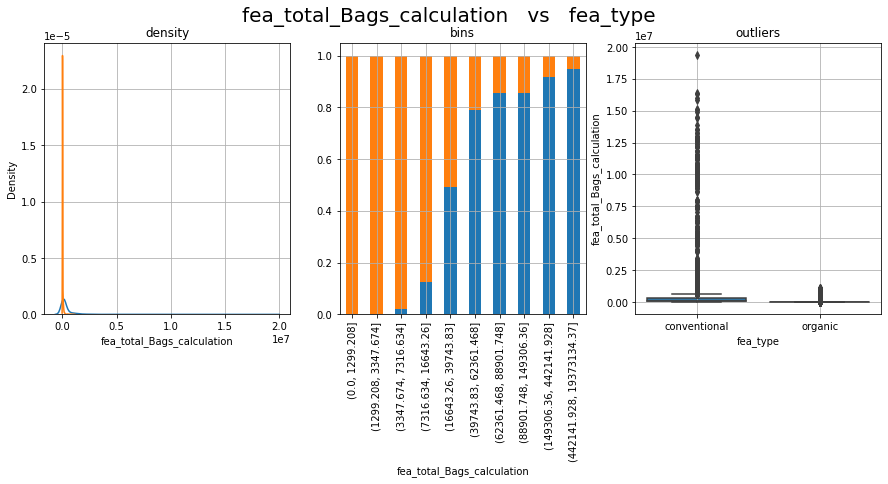

In [111]:
pre.bivariate_plot(data_analysis_all, x="fea_total_Bags_calculation", y="fea_type", figsize=(15,5))


In [112]:
#pre.bivariate_plot(data_analysis_all, x="fea_xlarge_bags", y="fea_average_price", figsize=(15,5))


In [113]:
#features_choose.append('fea_total_Bags_calculation')

##### 1.1.2.1.11. fea_year_

In [114]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_year_',max_cat=2)

'num'

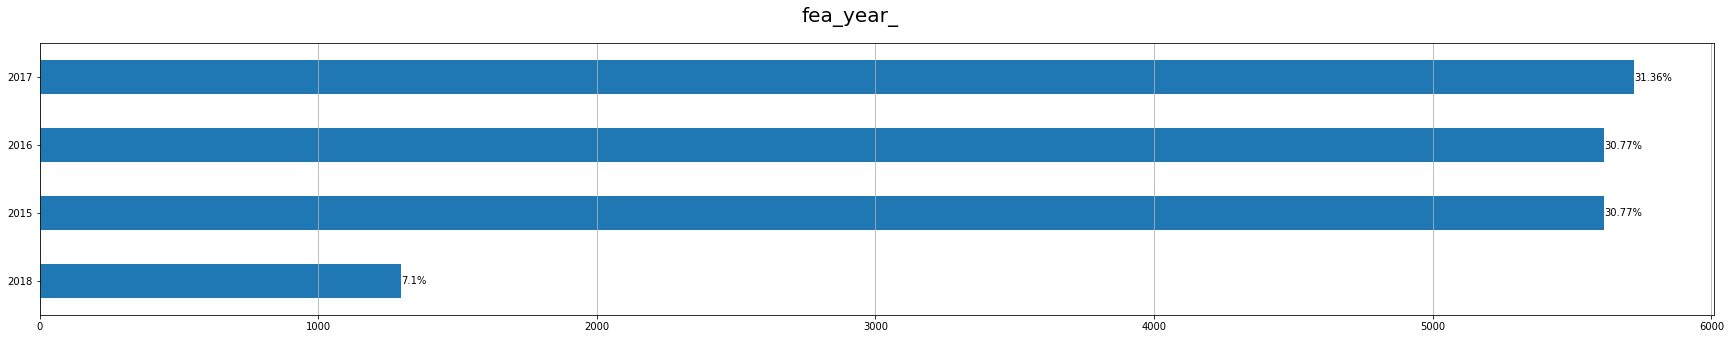

(Text(0.5, 0.98, 'fea_year_'), None)

In [115]:
pre.freqdist_plot(data_analysis_all, "fea_year_", figsize=(30,5))

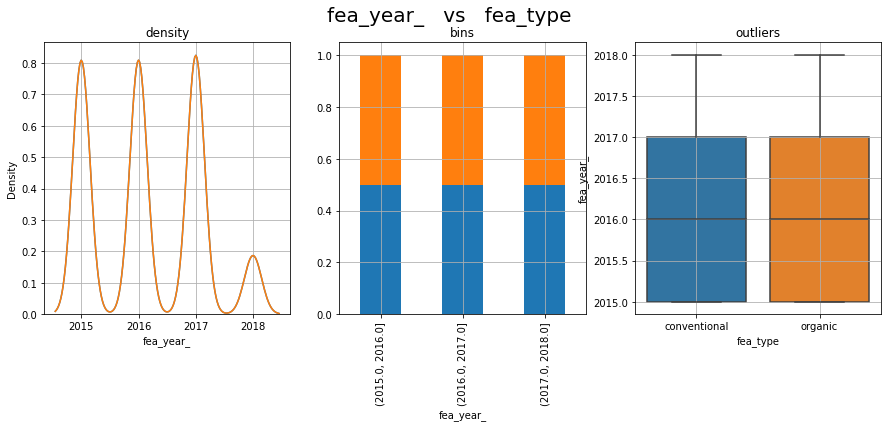

In [116]:
pre.bivariate_plot(data_analysis_all, x="fea_year_", y="fea_type", figsize=(15,5), max_cat=2)


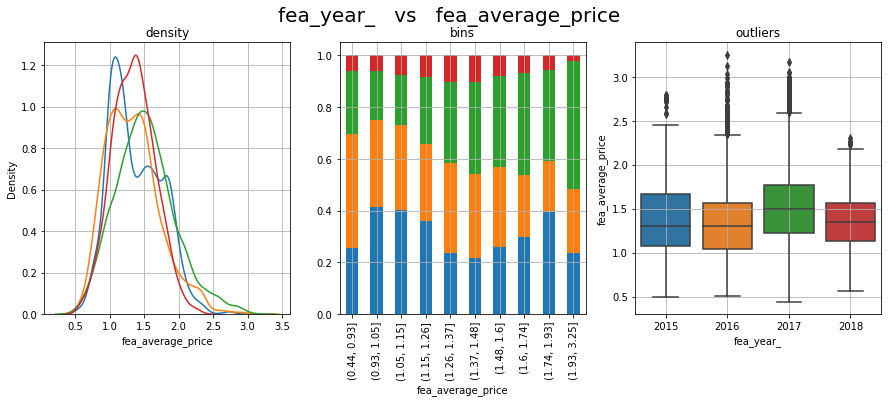

In [117]:
pre.bivariate_plot(data_analysis_all, x="fea_year_", y="fea_average_price", figsize=(15,5), )


In [118]:
features_choose.append('fea_year_')

##### 1.1.2.1.12. fea_month

In [119]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_month',max_cat=20)


'cat'

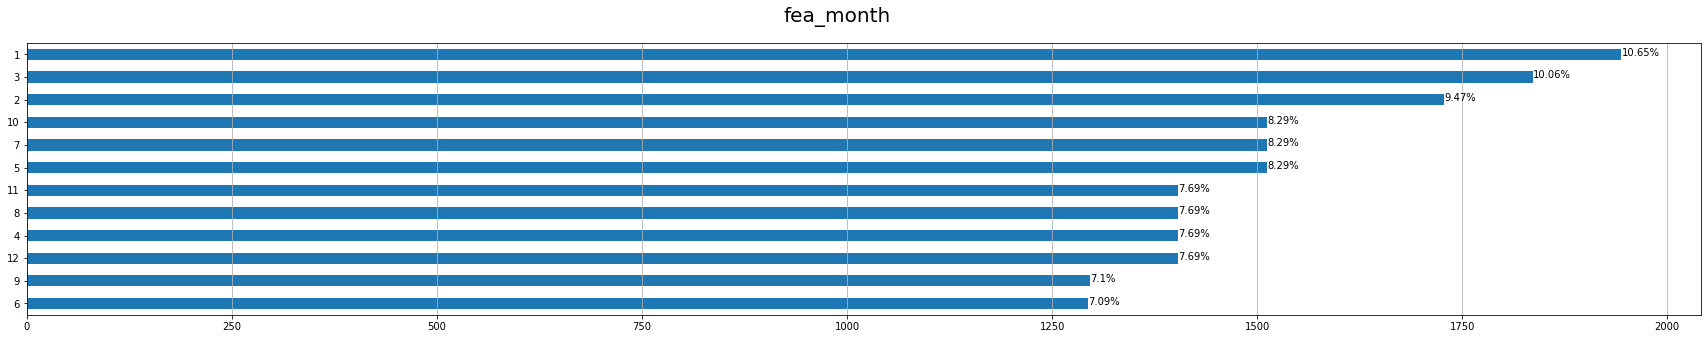

(Text(0.5, 0.98, 'fea_month'), None)

In [120]:
pre.freqdist_plot(data_analysis_all, "fea_month", figsize=(30,5))


--- got error ---
rename() got an unexpected keyword argument 'columns'


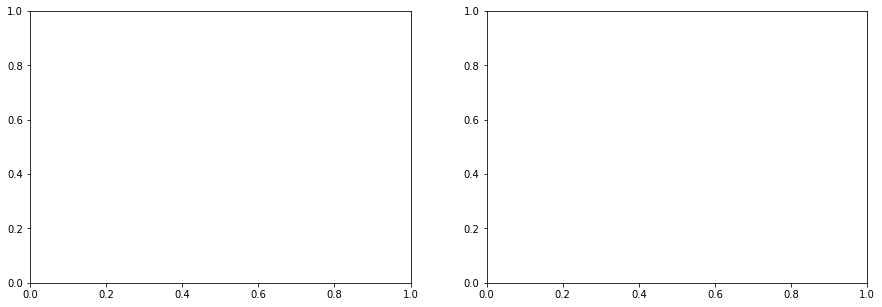

In [121]:
pre.bivariate_plot(data_analysis_all, x="fea_month", y="fea_type", figsize=(15,5))


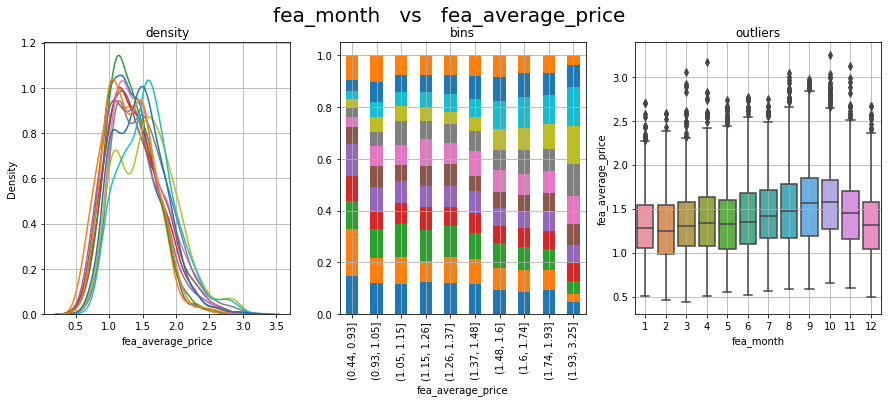

In [122]:
pre.bivariate_plot(data_analysis_all, x="fea_month", y="fea_average_price", figsize=(15,5), max_cat=20)


In [123]:
features_choose.append('fea_month')

##### 1.1.2.1.13. fea_day

In [124]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_day',max_cat=20)


'num'

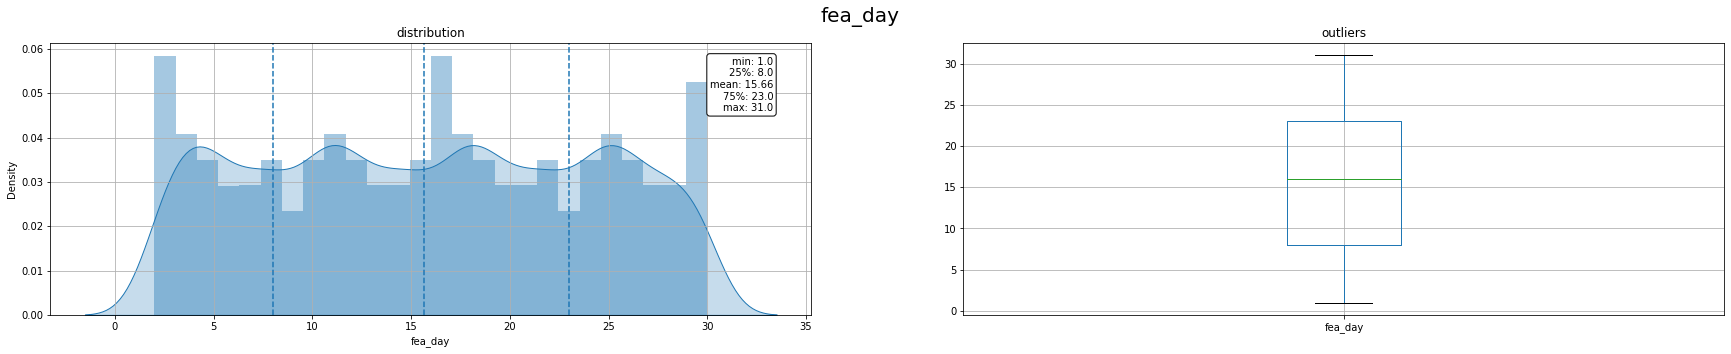

In [125]:
pre.freqdist_plot(data_analysis_all, "fea_day", figsize=(30,5))


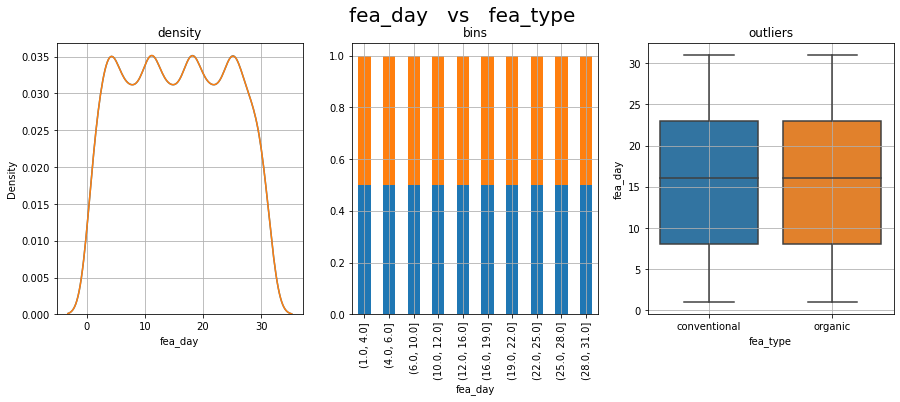

In [126]:
pre.bivariate_plot(data_analysis_all, x="fea_day", y="fea_type", figsize=(15,5))


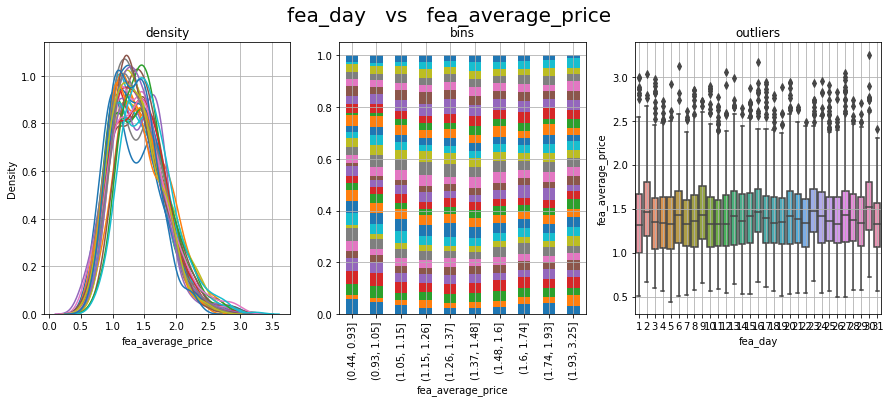

In [127]:
pre.bivariate_plot(data_analysis_all, x="fea_day", y="fea_average_price", figsize=(15,5), max_cat=40)


In [128]:
features_choose.append('fea_day')

##### 1.1.2.1.14. fea_weekofyear


In [129]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_weekofyear',max_cat=20)


'num'

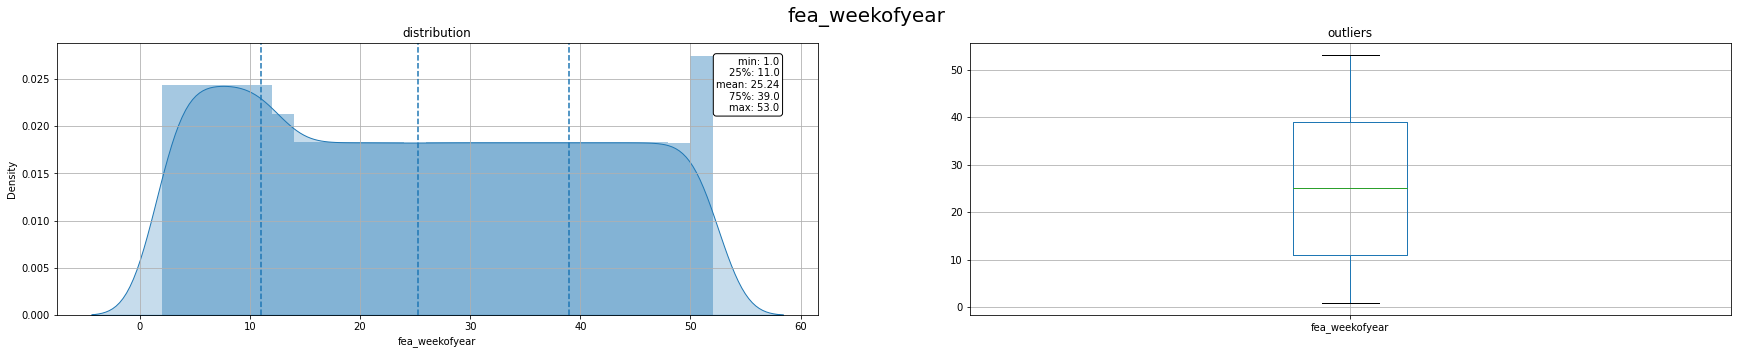

In [130]:
pre.freqdist_plot(data_analysis_all, "fea_weekofyear", figsize=(30,5))


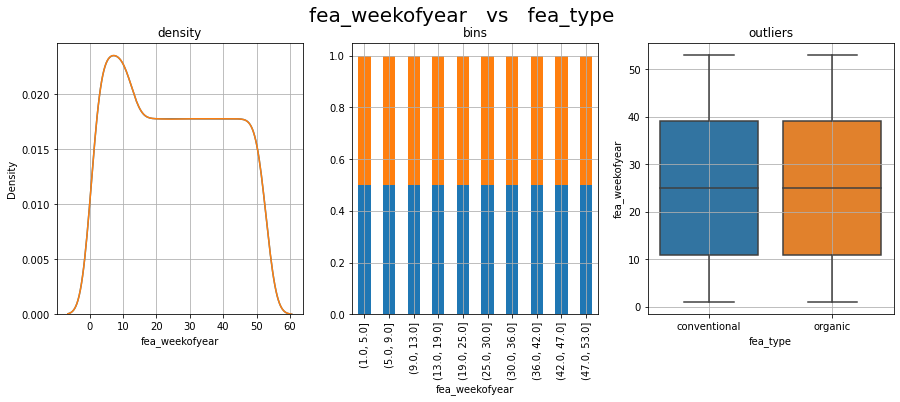

In [131]:
pre.bivariate_plot(data_analysis_all, x="fea_weekofyear", y="fea_type", figsize=(15,5))

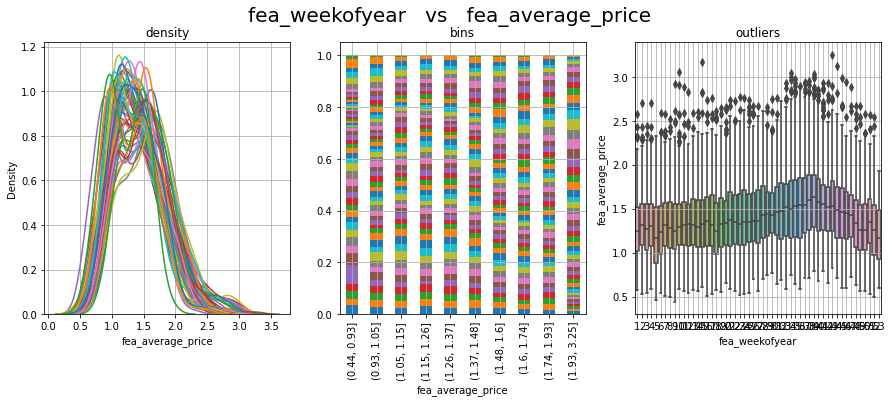

In [132]:
pre.bivariate_plot(data_analysis_all, x="fea_weekofyear", y="fea_average_price", figsize=(15,5), max_cat=54)


In [133]:
features_choose.append('fea_weekofyear')

##### 1.1.2.1.15. fea_daily


In [134]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_daily',max_cat=20)


'cat'

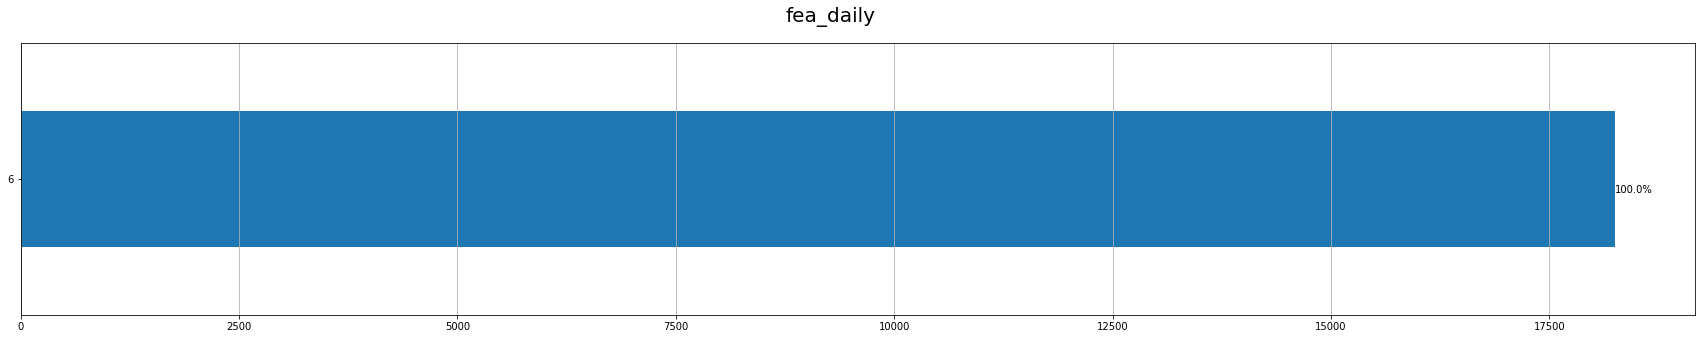

(Text(0.5, 0.98, 'fea_daily'), None)

In [135]:
pre.freqdist_plot(data_analysis_all, "fea_daily", figsize=(30,5))


In [136]:
#pre.bivariate_plot(data_analysis_all, x="fea_daily", y="fea_type", figsize=(15,5))


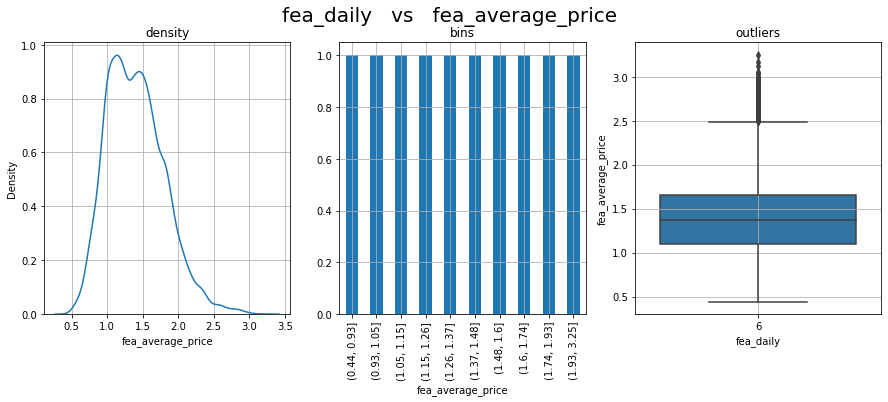

In [137]:
pre.bivariate_plot(data_analysis_all, x="fea_daily", y="fea_average_price", figsize=(15,5))


In [138]:
features_choose.append('fea_daily')

##### 1.1.2.1.16. fea_id

In [139]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_id',max_cat=20)


'num'

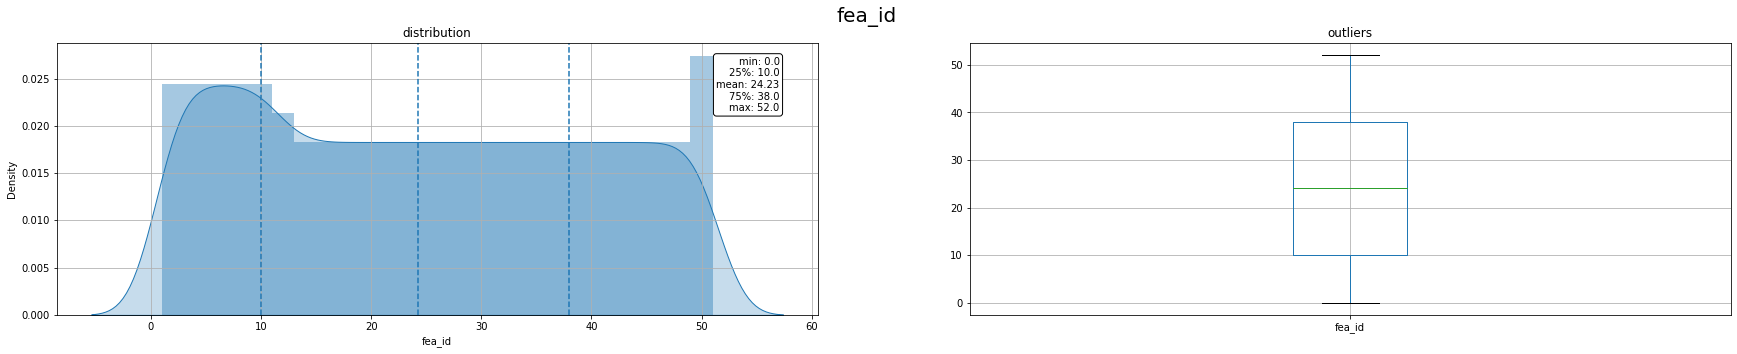

In [140]:
pre.freqdist_plot(data_analysis_all, "fea_id", figsize=(30,5))


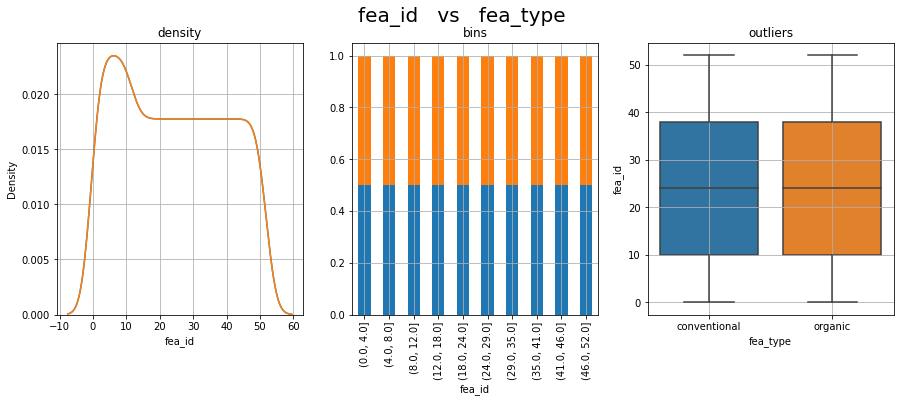

In [141]:
pre.bivariate_plot(data_analysis_all, x="fea_id", y="fea_type", figsize=(15,5))


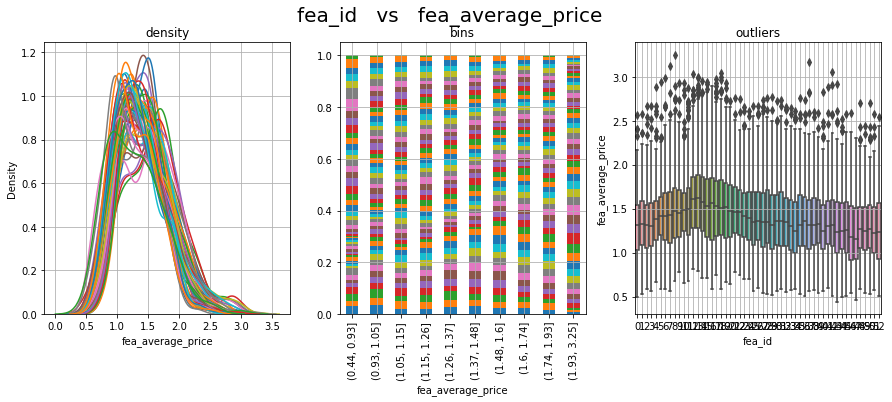

In [142]:
pre.bivariate_plot(data_analysis_all, x="fea_id", y="fea_average_price", figsize=(15,5), max_cat=60)


In [143]:
features_choose.append('fea_id')

### Nhận xét tổng:
- Thuộc tính type:
    - organic: Hữu cơ thì có tính chất biến đống ít hơn
    - conventional: Thông thường giá thường biến động rất mạnh, outlier nhiều
- Cần gán nhãn thuộc tính
- Xem tính đa công tuyến và k-best như thế nào

### 1.2. Preprocessing
###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [144]:
features_choose

['fea_average_price',
 'fea_type',
 'fea_region',
 'fea_total_Volume',
 'fea_item_4046',
 'fea_item_4225',
 'fea_item_4770',
 'fea_total_Bags',
 'fea_small_bags',
 'fea_large_bags',
 'fea_xlarge_bags',
 'total_volumn_item',
 'fea_year_',
 'fea_month',
 'fea_day',
 'fea_weekofyear',
 'fea_daily',
 'fea_id']

In [145]:
data_analysis_final = data_analysis_all[features_choose]

In [146]:
check = pre.data_preprocessing(data_analysis_final, y="fea_average_price", task="regression")

--- check missing ---
   OK: No missing
--- check categorical data ---
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


#### 1.2.1. Phân vụng dữ liệu - Partitioning

In [147]:
dtf_train, dtf_test = pre.dtf_partitioning(data_analysis_final, y="fea_average_price", test_size=0.3, shuffle=False)

X_train shape: (12774, 17) | X_test shape: (5475, 17)
y_train mean: 1.29 | y_test mean: 1.67
18 features: ['fea_type', 'fea_region', 'fea_total_Volume', 'fea_item_4046', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags', 'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item', 'fea_year_', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id']


#### Nhận xét:
- Dữ liệu test và dữ liệu train có sự chêch lệch quá lớn

#### 1.2.2. Missing values
- Dữ liệu không có missing value

#### 1.2.3. Categorical Encoding

In [148]:
data_analysis_final = pre.add_dummies(data_analysis_final, x="fea_type", dropx=True)
data_analysis_final

       fea_type  fea_type_organic
1  conventional                 0
2  conventional                 0
3  conventional                 0
4  conventional                 0
5  conventional                 0


,fea_average_price,fea_region,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,total_volumn_item,fea_year_,fea_month,fea_day,fea_weekofyear,fea_daily,fea_id,fea_type_organic
1,1.33,Albany,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,55539.75,2015,12,27,52,6,0,0
2,1.35,Albany,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,45371.42,2015,12,20,51,6,1,0
3,0.93,Albany,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,110074.87,2015,12,13,50,6,2,0
4,1.08,Albany,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,73180.99,2015,12,6,49,6,3,0
5,1.28,Albany,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,44855.65,2015,11,29,48,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,1.63,WestTexNewMexico,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,3576.16,2018,2,4,5,6,7,1
18246,1.71,WestTexNewMexico,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,4623.20,2018,1,28,4,6,8,1
18247,1.87,WestTexNewMexico,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,4372.65,2018,1,21,3,6,9,1
18248,1.93,WestTexNewMexico,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,5235.68,2018,1,14,2,6,10,1


In [149]:
data_analysis_final = pre.add_dummies(data_analysis_final, x="fea_region", dropx=True)
data_analysis_final

  fea_region  fea_region_Atlanta  fea_region_BaltimoreWashington  \
1     Albany                   0                               0   
2     Albany                   0                               0   
3     Albany                   0                               0   
4     Albany                   0                               0   
5     Albany                   0                               0   

   fea_region_Boise  fea_region_Boston  fea_region_BuffaloRochester  \
1                 0                  0                            0   
2                 0                  0                            0   
3                 0                  0                            0   
4                 0                  0                            0   
5                 0                  0                            0   

   fea_region_California  fea_region_Charlotte  fea_region_Chicago  \
1                      0                     0                   0   
2                      0

,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,total_volumn_item,...,fea_region_SouthCarolina,fea_region_SouthCentral,fea_region_Southeast,fea_region_Spokane,fea_region_StLouis,fea_region_Syracuse,fea_region_Tampa,fea_region_TotalUS,fea_region_West,fea_region_WestTexNewMexico
1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,55539.75,...,0,0,0,0,0,0,0,0,0,0
2,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,45371.42,...,0,0,0,0,0,0,0,0,0,0
3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,110074.87,...,0,0,0,0,0,0,0,0,0,0
4,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,73180.99,...,0,0,0,0,0,0,0,0,0,0
5,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,44855.65,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,3576.16,...,0,0,0,0,0,0,0,0,0,1
18246,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,4623.20,...,0,0,0,0,0,0,0,0,0,1
18247,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,4372.65,...,0,0,0,0,0,0,0,0,0,1
18248,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,5235.68,...,0,0,0,0,0,0,0,0,0,1


#### 1.2.3. Scaler

In [150]:
#scalerX = pre.RobustScaler(quantile_range=(25.0, 75.0))
#scalerY = pre.RobustScaler(quantile_range=(25.0, 75.0))

In [151]:
#data_analysis_final, scalerX, scalerY = pre.scaling(data_analysis_final, y="fea_average_price", scalerX=scalerX, scalerY=scalerY, task="regression")

In [152]:
pre.df_overview(data_analysis_final, columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (18249, 70)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,fea_average_price,Continious,Nas: 0(0%),Min-Max: (0)-(3)
1,fea_total_Volume,Continious,Nas: 0(0%),Min-Max: (84)-(62505646)
2,fea_item_4046,Continious,Nas: 0(0%),Min-Max: (0)-(22743616)
3,fea_item_4225,Continious,Nas: 0(0%),Min-Max: (0)-(20470572)
4,fea_item_4770,Continious,Nas: 0(0%),Min-Max: (0)-(2546439)
...,...,...,...,...
65,fea_region_Syracuse,categorical,Nas: 0(0%),Categories: 2
66,fea_region_Tampa,categorical,Nas: 0(0%),Categories: 2
67,fea_region_TotalUS,categorical,Nas: 0(0%),Categories: 2
68,fea_region_West,categorical,Nas: 0(0%),Categories: 2


### 1.3. Baseline (xgboost)
### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Model Design
- Train / Test
- Evaluate
- Explainability
- Visualize model

#### 1.3.1. Features Selection

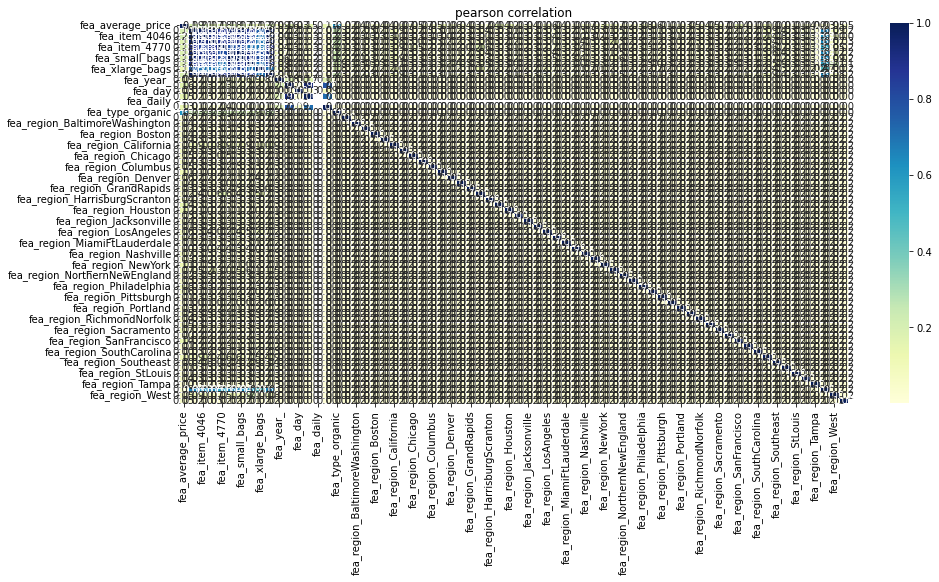

In [153]:
#--- correlation ---#
corr = pre.corr_matrix(data_analysis_final, method="pearson", negative=False, annotation=True, figsize=(15,7))

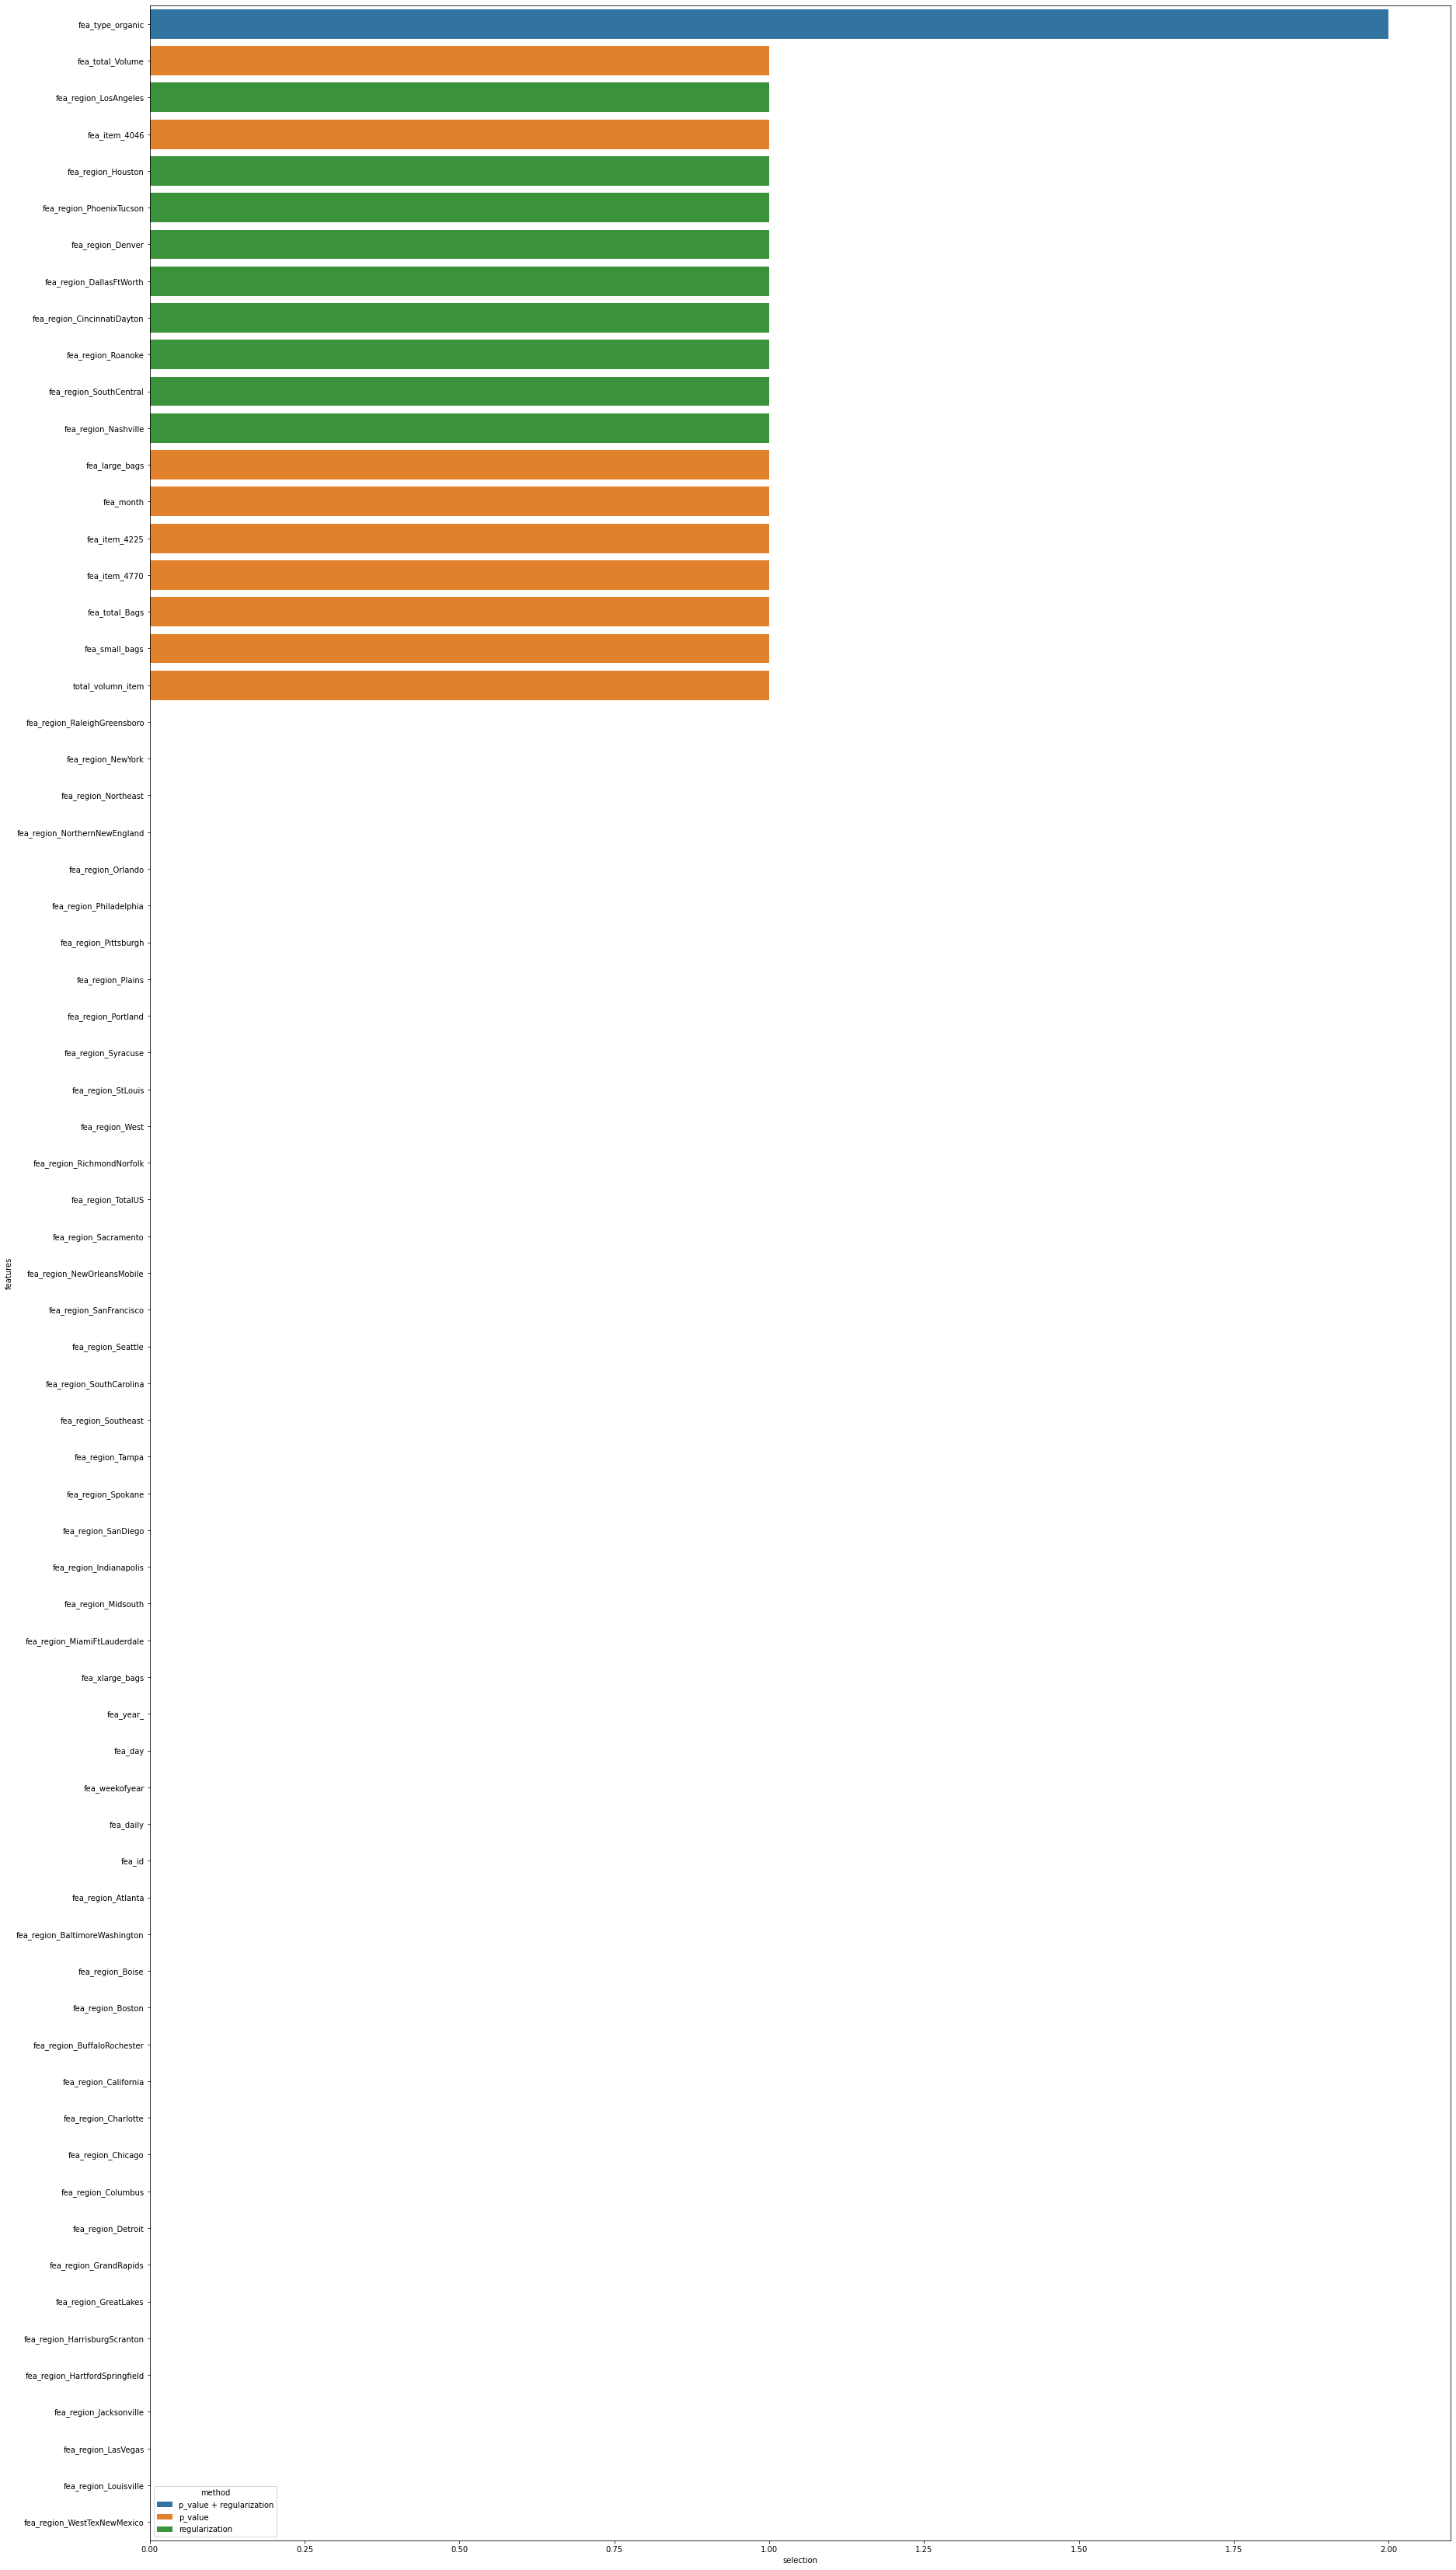

In [154]:
#--- p values ---#
dic_feat_sel = fea.features_selection(data_analysis_final, y="fea_average_price", task="regression", top=10, figsize=(30,60))

--- model used ---
RandomForestRegressor(random_state=0)


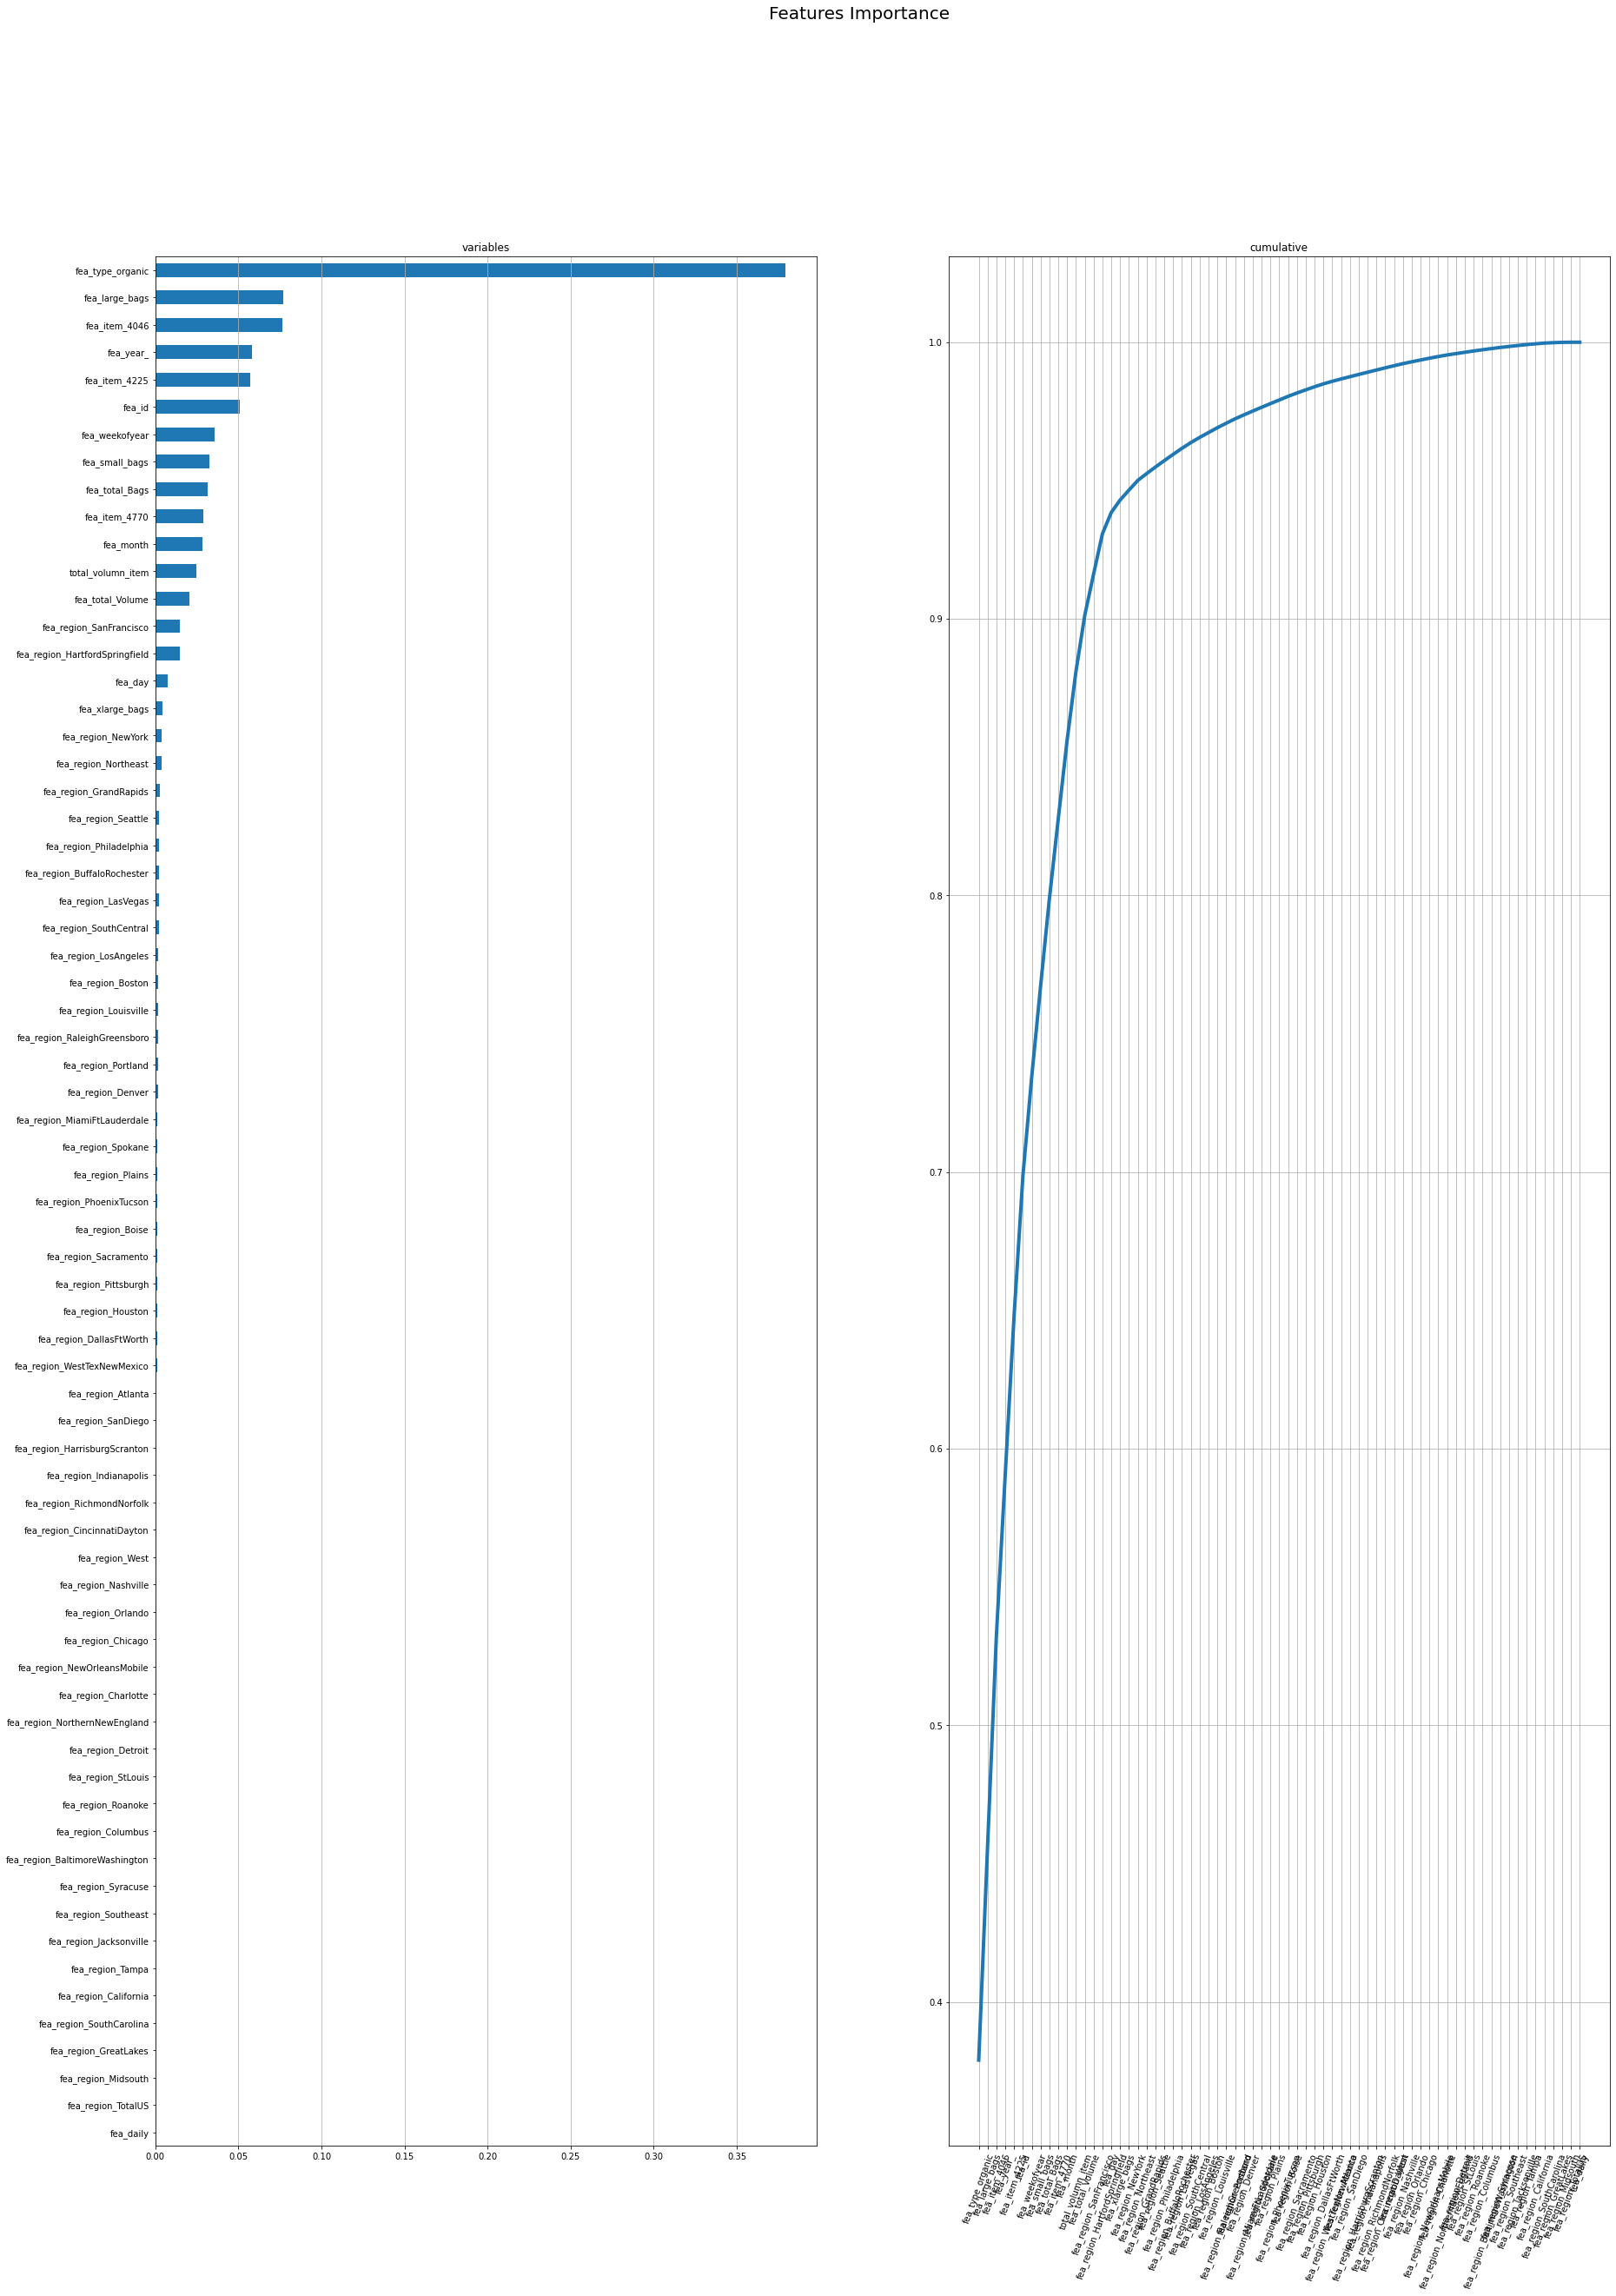

In [155]:
#--- importance ---#
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="mse", random_state=0)

feat_imp = fea.features_importance(X=data_analysis_final.drop("fea_average_price",axis=1).values, y=data_analysis_final["fea_average_price"].values, 
                               X_names=data_analysis_final.drop("fea_average_price",axis=1).columns.tolist(), 
                               model=model, task="regression", figsize=(30,40))

#### Nhận xét:
- Những thuộc tính ảnh hưởng đến bài toán nhiều:
    - lst_k_best = ['fea_type_organic','fea_total_Volume', 'fea_region_LosAngeles', 'fea_item_4046', 'fea_region_Houston','fea_region_PhoenixTucson', 'fea_region_Denver', 'fea_region_DallasFtWorth'
    ,'fea_region_CincinnatiDayton', 'fea_region_Roanoke', 'fea_region_SouthCentral', 'fea_region_Nashville', 'fea_large_bags', 'fea_month', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags','fea_small_bags','total_volumn_item' ]

#### 1.3.2. Chọn thuộc tính k-best

In [156]:
data_analysis_final.columns

Index(['fea_average_price', 'fea_total_Volume', 'fea_item_4046',
       'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags',
       'fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item', 'fea_year_',
       'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_id',
       'fea_type_organic', 'fea_region_Atlanta',
       'fea_region_BaltimoreWashington', 'fea_region_Boise',
       'fea_region_Boston', 'fea_region_BuffaloRochester',
       'fea_region_California', 'fea_region_Charlotte', 'fea_region_Chicago',
       'fea_region_CincinnatiDayton', 'fea_region_Columbus',
       'fea_region_DallasFtWorth', 'fea_region_Denver', 'fea_region_Detroit',
       'fea_region_GrandRapids', 'fea_region_GreatLakes',
       'fea_region_HarrisburgScranton', 'fea_region_HartfordSpringfield',
       'fea_region_Houston', 'fea_region_Indianapolis',
       'fea_region_Jacksonville', 'fea_region_LasVegas',
       'fea_region_LosAngeles', 'fea_region_Louisville',
       'fea_region_M

In [157]:
lst_k_best_option1 = ['fea_type_organic','fea_total_Volume', 'fea_region_LosAngeles', 'fea_item_4046', 'fea_region_Houston','fea_region_PhoenixTucson', 'fea_region_Denver', 
              'fea_region_DallasFtWorth','fea_region_CincinnatiDayton', 'fea_region_Roanoke', 'fea_region_SouthCentral', 'fea_region_Nashville', 
              'fea_large_bags', 'fea_month', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags','fea_small_bags','total_volumn_item' ]
lst_k_best_option2 = ['fea_type_organic', 'fea_large_bags', 'fea_item_4046', 'fea_year_', 'fea_item_4225', 'fea_id','fea_small_bags', 'fea_total_Bags', 'fea_item_4770', 'fea_month', 
    'total_volumn_item', 'fea_total_Volume','fea_xlarge_bags' ]

#### Nhận xét:
    - Ta thấy các vùng sáu bán hàng được: fea_region_LosAngeles, fea_region_HartfordSpringfield theo hình trên
    - Và thuộc tính fea_xlarge_bags thì thấp do lượng người mua ít

### 1.4. Data summary model

#### 1.4.1. Data standardizing - Chuẩn hóa dữ liệu
- Feature scaling: RobusScaler

In [158]:
lst_lientuc_chosen = ['fea_total_Volume', 'fea_item_4046', 'fea_item_4225', 'fea_item_4770', 'fea_total_Bags', 'fea_small_bags','fea_large_bags', 'fea_xlarge_bags', 'total_volumn_item']

In [159]:
data_analysis_scaler = pre.robust_Scaler(df=data_analysis_final,lst_lientuc_chosen=lst_lientuc_chosen)
data_analysis_scaler.index += 1 
data_analysis_scaler

close


,fea_total_Volume_scaler,fea_item_4046_scaler,fea_item_4225_scaler,fea_item_4770_scaler,fea_total_Bags_scaler,fea_small_bags_scaler,fea_large_bags_scaler,fea_xlarge_bags_scaler,total_volumn_item_scaler
1,-0.10,-0.07,0.17,-0.02,-0.29,-0.22,-0.12,0.00,-0.01
2,-0.12,-0.07,0.11,-0.02,-0.29,-0.21,-0.12,0.00,-0.04
3,0.03,-0.07,0.54,-0.01,-0.30,-0.23,-0.12,0.00,0.17
4,-0.07,-0.07,0.29,-0.02,-0.32,-0.26,-0.11,0.00,0.05
5,-0.13,-0.07,0.10,-0.02,-0.32,-0.25,-0.11,0.00,-0.04
...,...,...,...,...,...,...,...,...,...
18245,-0.21,-0.06,-0.19,-0.03,-0.25,-0.17,-0.10,0.00,-0.18
18246,-0.22,-0.07,-0.17,-0.03,-0.29,-0.22,-0.11,0.00,-0.18
18247,-0.22,-0.07,-0.18,0.09,-0.29,-0.21,-0.12,0.00,-0.18
18248,-0.22,-0.06,-0.18,0.09,-0.27,-0.19,-0.12,0.00,-0.17


In [160]:
data_analysis_scaler.columns

Index(['fea_total_Volume_scaler', 'fea_item_4046_scaler',
       'fea_item_4225_scaler', 'fea_item_4770_scaler', 'fea_total_Bags_scaler',
       'fea_small_bags_scaler', 'fea_large_bags_scaler',
       'fea_xlarge_bags_scaler', 'total_volumn_item_scaler'],
      dtype='object')

In [161]:
data_analysis_date = pre.change_feature_seriesToDataframe(df=df,lst_feature='Date', names='fea_date')
data_analysis_date

,fea_date
1,2015-12-27
2,2015-12-20
3,2015-12-13
4,2015-12-06
5,2015-11-29
...,...
18245,2018-02-04
18246,2018-01-28
18247,2018-01-21
18248,2018-01-14


In [162]:
lst = ['Id','Date','AveragePrice','Total_Volume','Item_4046','Item_4225','Item_4770','Total_Bags','Small_Bags',
    'Large_Bags','XLarge_Bags','type','year','region']
data_origin = df[lst]
data_origin

,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


#### 1.4.2. Combine data

In [163]:
# compare data
lst_concat = [data_analysis_date, data_analysis_final, data_analysis_scaler, data_origin]

In [164]:
#import pandas as pd
#data_model_final = pd.concat(lst_concat, ignore_index=True)
data_model_final = pre.dataframe_concat(lst_concat=lst_concat)
data_model_final

,fea_date,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,...,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,...,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,...,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,...,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18246,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,...,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18247,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,...,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18248,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,...,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


#### 1.4.3. Xuất dữ liệu
- Dùng để làm bước tiếp theo phân tích data analysis

In [165]:
data_model_final.to_csv('data/avocado_model.csv')

# Step 3.0 Phân tích dữ liệu theo 1 hướng mới

## A. Xem mồi quan hệ giữa các biến với nhau

In [166]:
#pre.corr_headmap(df=df, width=12, height=6)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Key                18249 non-null  int32         
 1   Id                 18249 non-null  int32         
 2   Date               18249 non-null  datetime64[ns]
 3   AveragePrice       18249 non-null  float64       
 4   Total_Volume       18249 non-null  float64       
 5   Item_4046          18249 non-null  float64       
 6   Item_4225          18249 non-null  float64       
 7   Item_4770          18249 non-null  float64       
 8   Total_Bags         18249 non-null  float64       
 9   Small_Bags         18249 non-null  float64       
 10  Large_Bags         18249 non-null  float64       
 11  XLarge_Bags        18249 non-null  float64       
 12  type               18249 non-null  object        
 13  year               18249 non-null  int32         
 14  region

### 1.1. Thêm doanh thu bán hàng 
- Doanh thu = sản lượng * đơn giá trung bình
- Cần xem lại dữ liệu của 52 bang nước mỹ
- Xem lại mức độ tương quan dữ liệu giữa biến giá trung bình và volume

In [168]:
pre.calculation_2_feature(df=df, name_feature1='AveragePrice',name_feature2='Total_Volume', name_new_feature='AverageRevenue',choose='nhân')

,Key,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,...,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year_,fea_region,AverageRevenue
1,1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,85434.70
2,2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,74083.92
3,3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,109944.80
4,4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,85311.52
5,5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,65330.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,...,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico,27831.97
18246,18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,...,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico,23748.55
18247,18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,...,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico,25743.84
18248,18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,...,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico,31276.07


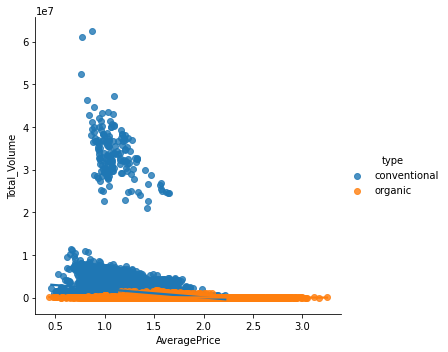

In [169]:
# Xem mức độ tương quan giá giữa các loại bơ với biến sản lượng
pre.corr_lmplot(df=df, varable_continious_x='AveragePrice', varable_continious_y='Total_Volume', variable_categorical='type')

#### Nhận xét:
- Bơ truyền thống: thì ta thấy giá thấp hơn nhiều so với bơ organic (bơ hữu cơ) => Những về mặt sản lưởng thì có sư phân top rõ ràng
- Cần xem xét lượng tiêu thụ và doanh thu của 2 loại bơ thế nào ?

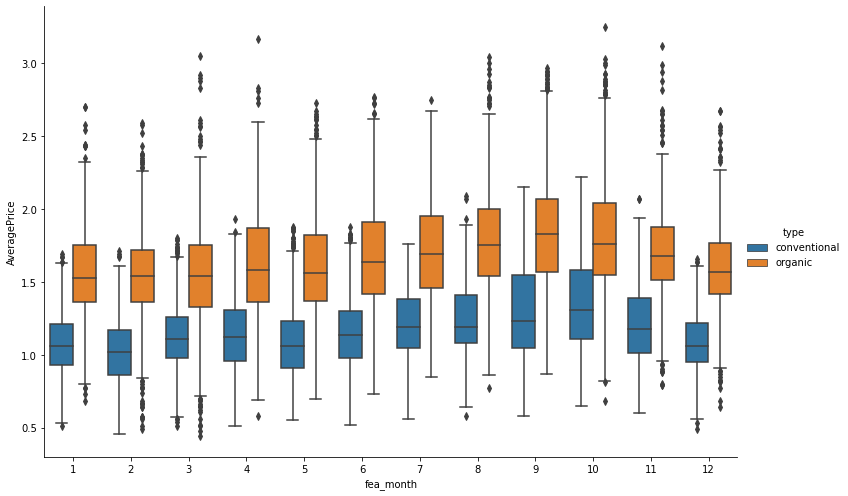

In [170]:
# Xem mức độ giá của 2 loại bơ
pre.diff_varibale_factorplot(df=df, time='fea_month', variable_continious='AveragePrice', variable_categorical='type', kind='box')

### Nhận xét:
- Bơ hữu cơ có giá trị cao hơn bơ truyền thống
- Các tháng trong năm có mực độ biên đổng giá có nghĩa bơ theo mua vụ
- Cần xem mức độ bơ có xu hướng thế nào và doanh thu cũng như số lượng của các loại bơ thế nào ?

<AxesSubplot:xlabel='fea_year', ylabel='Total_Volume'>

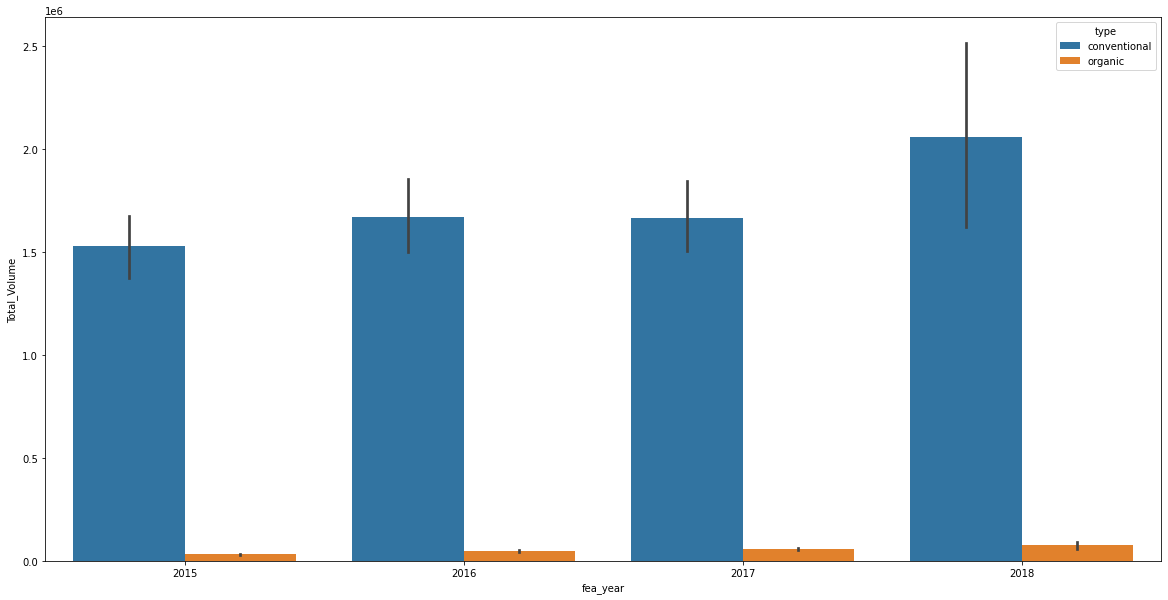

In [171]:
pre.barplot_feature(df=df, x_time='fea_year', variable_categorical='type', variable_continious='Total_Volume')

<AxesSubplot:xlabel='fea_year', ylabel='AverageRevenue'>

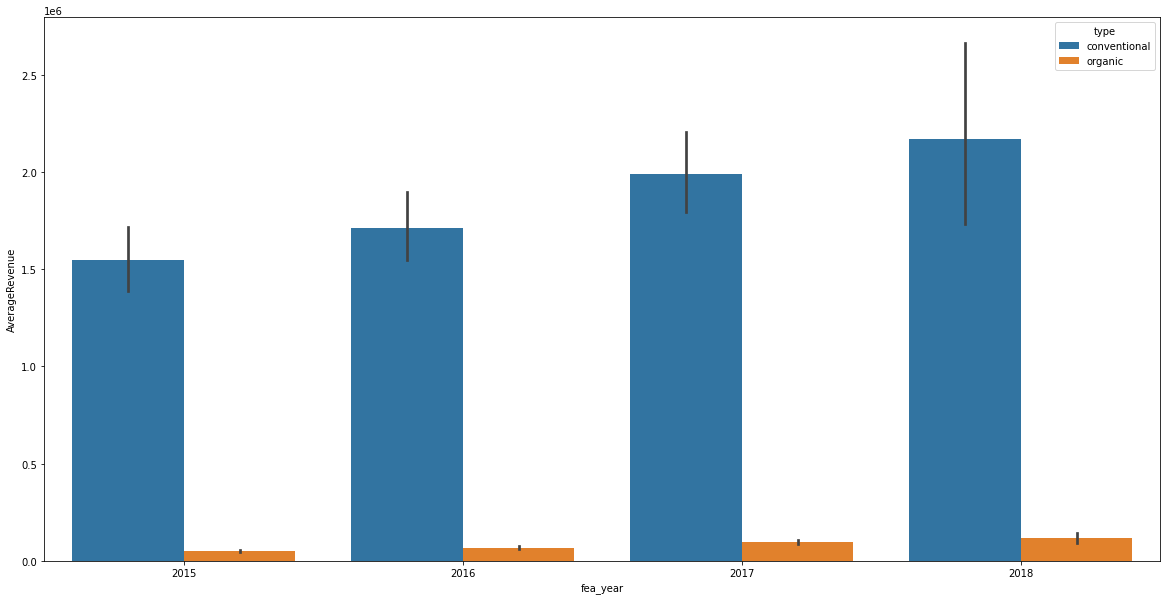

In [172]:
pre.barplot_feature(df=df, x_time='fea_year', variable_categorical='type', variable_continious='AverageRevenue')

### Nhận xét:
- Sản lưởng của công ty phụ thuộc vào bơ truyền thống là chủ yếu và tốc độ bơ hưu cơ càng ngày càng tăng qua các năm về số lượng cũng như doanh thu
- Cần xem xét mức độ % tăng qua các năm của các loại bơ => Nhưng lượng bơ năm 2018 có xu hướng tăng đột biến mới chỉ 3 tháng đầu năm mà đã hơn các năm khác của 12 tháng

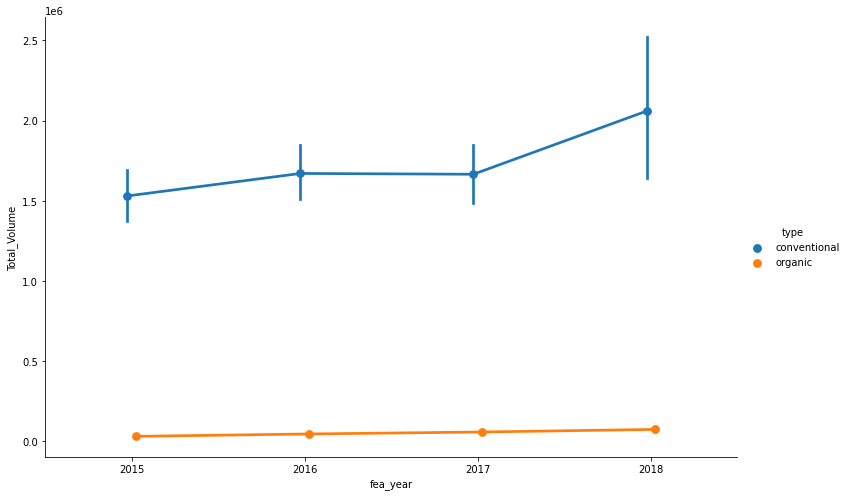

In [173]:
pre.diff_varibale_factorplot_dodge(df=df, time='fea_year',variable_continious='Total_Volume', variable_categorical='type')

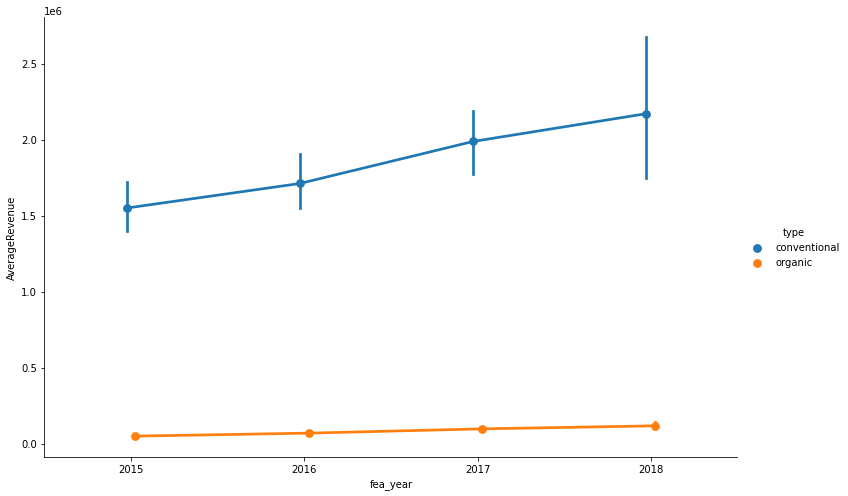

In [174]:
pre.diff_varibale_factorplot_dodge(df=df, time='fea_year',variable_continious='AverageRevenue', variable_categorical='type')

### Nhận xét:
- Công ty phụ thuộc vào loại bơ thông thương quá nhiều và có xu hương tăng qua các năm
- Con về bơ hữu cơ thì không có sự đột biến cho lắm

Text(0.5, 1.0, 'Total_Volume')

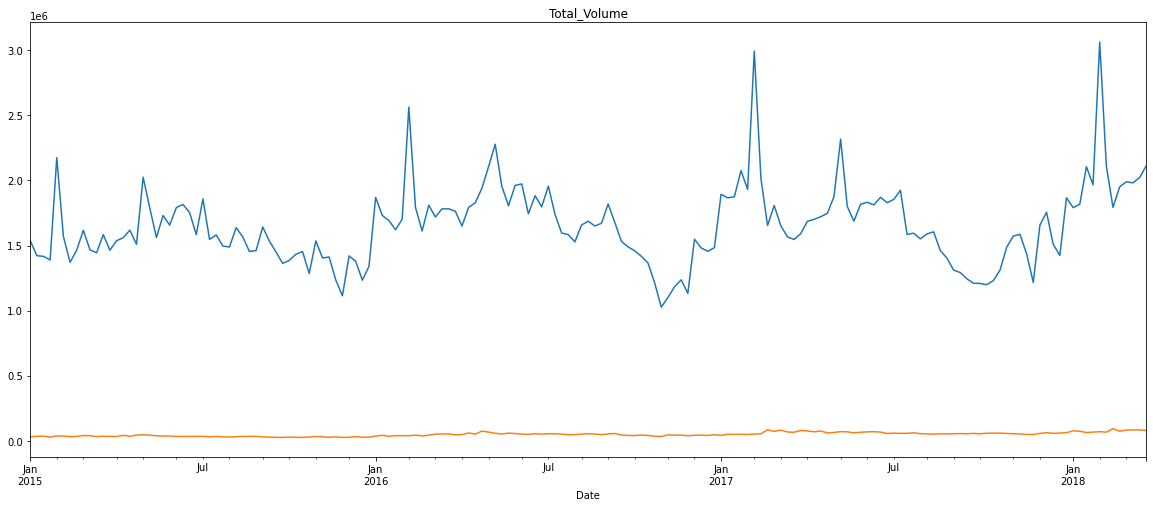

In [175]:
import matplotlib.pyplot as plt
# Xem xét biến động giá của 2 loại bơ qua thời gian của dữ liệu
byDate_conv=df[df["type"]=="conventional"].groupby('Date').mean()
byDate_org=df[df["type"]=="organic"].groupby('Date').mean()
plt.figure(figsize=(20,8))
byDate_conv['Total_Volume'].plot()
byDate_org['Total_Volume'].plot()
plt.title('Total_Volume')

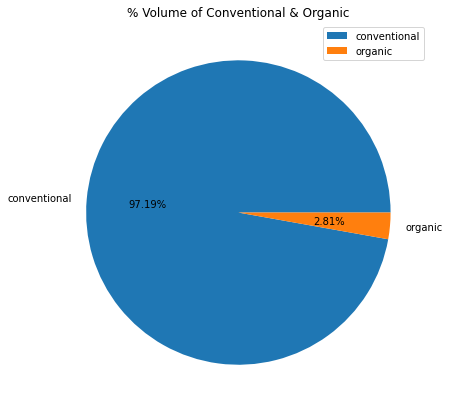

In [176]:
# Pie chart cho tổng sản lượng tiêu thụ của 2 loại bơ qua các năm
plt.figure(figsize=(7,7))
volume = df.groupby("type").agg({"Total_Volume":"sum"})
plt.pie(volume["Total_Volume"], labels = volume.index, autopct='%1.2f%%')
plt.title("% Volume of Conventional & Organic")
plt.legend()
plt.show() 

Text(0.5, 1.0, 'AveragePrice')

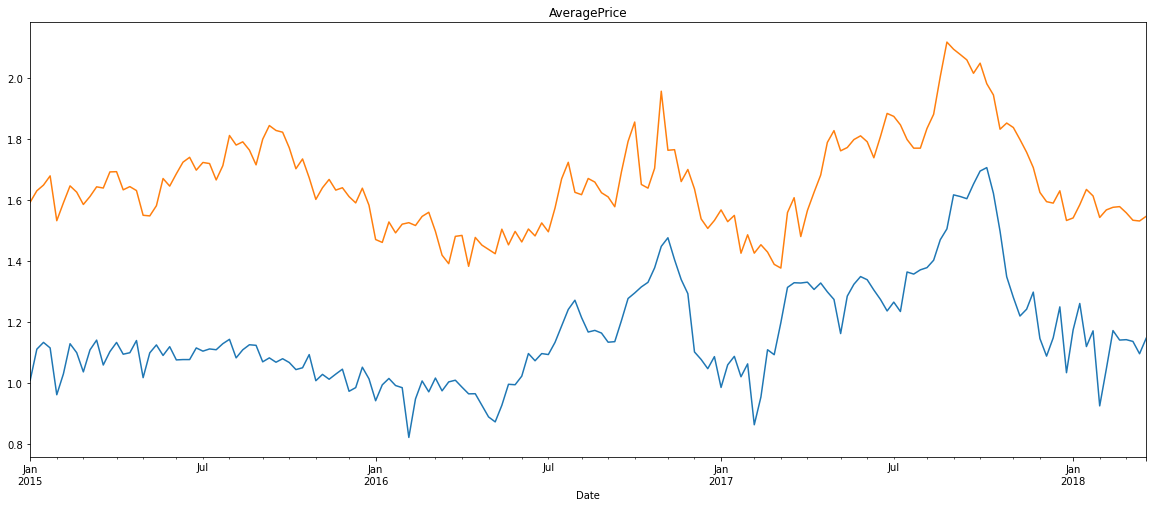

In [177]:
import matplotlib.pyplot as plt
# Xem xét biến động giá của 2 loại bơ qua thời gian của dữ liệu
byDate_conv=df[df["type"]=="conventional"].groupby('Date').mean()
byDate_org=df[df["type"]=="organic"].groupby('Date').mean()
plt.figure(figsize=(20,8))
byDate_conv['AveragePrice'].plot()
byDate_org['AveragePrice'].plot()
plt.title('AveragePrice')

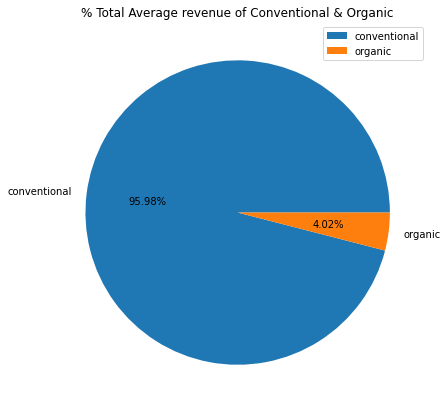

In [178]:
# Pie chart cho tổng doanh thu bình quân của 2 loại bơ qua các năm
plt.figure(figsize=(7,7))
avg_revenue = df.groupby("type").agg({"AverageRevenue":"sum"})
plt.pie(avg_revenue["AverageRevenue"], labels = avg_revenue.index, autopct='%1.2f%%')
plt.title("% Total Average revenue of Conventional & Organic")
plt.legend()
plt.show() 

### Nhận xét:
- Doanh thu hữu cơ chỉ tăng chưa đến 1.2% so với về giá trị nhưng không đáng kể so với bơ truyền thống
- Giá bơ hưu cơ đặt hơn so với bơ truyên thống khoảng cẩn varibale giữa 2 loại bơ gần giống nhau

## B. DATA ANALYSIS

### 1.1. Import

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

### 1.2. Groupby data

In [180]:
#data_region = df.groupby(by=["fea_year", "region", 'type']).agg({"Total_Volume":"sum","AverageRevenue":"sum"})
#data_region['Average_price_year'] = data_region['AverageRevenue']/data_region['Total_Volume']
#data_region = data_region.sort_values(by=["Total_Volume","AverageRevenue"],ascending=False).reset_index()
#data_region

In [181]:
rfm_agg = df.groupby(by=["fea_year", "type", "region"]).agg({
    'Total_Volume': 'sum',
    'AverageRevenue': ['sum', 'count']}).round(0)
rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['Total_Volume_Sum','Average_Revenue_Sum', 'Count']

rfm_agg['Average_Price'] = rfm_agg['Average_Revenue_Sum']/rfm_agg['Total_Volume_Sum']

rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

### 1.3. Chọn dữ liệu conventional và Average_Revenue_Sum

In [182]:
# Lọc dữ liệu conventional
feature_name = 'type'
name_type = 'conventional'
data_conventional = pre.filter_dataframe(df=rfm_agg, feature_name=feature_name, name_type=name_type)

close


In [183]:
data_conventional.sort_values(by=['Average_Revenue_Sum'], inplace=True)
data_conventional.tail(20)

,fea_year,type,region,Total_Volume_Sum,Average_Revenue_Sum,Count,Average_Price,Percent
154,2016,conventional,Southeast,195118756.00,201291202.00,52,1.03,0.28
241,2017,conventional,Midsouth,158505865.00,207192722.00,53,1.31,0.29
231,2017,conventional,GreatLakes,180425782.00,230214790.00,53,1.28,0.29
45,2015,conventional,SouthCentral,287254539.00,232612039.00,52,0.81,0.28
29,2015,conventional,Northeast,200497188.00,242804089.00,52,1.21,0.28
262,2017,conventional,Southeast,192639817.00,250073813.00,53,1.30,0.29
153,2016,conventional,SouthCentral,298001987.00,251298322.00,52,0.84,0.28
137,2016,conventional,Northeast,213418853.00,274356300.00,52,1.29,0.28
52,2015,conventional,West,294076306.00,275674065.00,52,0.94,0.28
261,2017,conventional,SouthCentral,318317944.00,295499491.00,53,0.93,0.29


### 1.4. Chọn dữ liệu organic và Average_Revenue_Sum

In [184]:
# Lọc dữ liệu organic
feature_name = 'type'
name_type = 'organic'
data_organic = pre.filter_dataframe(df=rfm_agg, feature_name=feature_name, name_type=name_type)

close


In [185]:
data_organic.sort_values(by=['Average_Revenue_Sum'], inplace=True)
data_organic.tail(20)

,fea_year,type,region,Total_Volume_Sum,Average_Revenue_Sum,Count,Average_Price,Percent
207,2016,organic,SouthCentral,6096713.00,7119612.00,52,1.17,0.28
292,2017,organic,LosAngeles,4950673.00,7543075.00,53,1.52,0.29
187,2016,organic,Midsouth,5220775.00,7868230.00,52,1.51,0.28
177,2016,organic,GreatLakes,6386889.00,8925527.00,52,1.40,0.28
298,2017,organic,NewYork,4618447.00,9118535.00,53,1.97,0.29
60,2015,organic,California,5969560.00,9307002.00,52,1.56,0.28
315,2017,organic,SouthCentral,7104671.00,9500326.00,53,1.34,0.29
191,2016,organic,Northeast,5512233.00,10358285.00,52,1.88,0.28
295,2017,organic,Midsouth,7047686.00,12125309.00,53,1.72,0.29
285,2017,organic,GreatLakes,8928084.00,13238891.00,53,1.48,0.29


## Nhận xét tổng quan
- Doanh thu và sản lượng công ty phụ thuộc vào bơ truyền thống
- TotalUS là bang nào nhưng tại sao chiểm sản lượng khá nhiều là sao ?
- Cần phải xem lại dữ liệu đối với những bang có sản lượng qua các năm

## C. TRỰC QUAN HÓA DỮ LIỆU

### 1.1. Chọn dữ liệu qua các năm

In [186]:
# Lọc dữ liệu organic
feature_name = 'region'
name_type = 'California'
data_visu = pre.filter_dataframe(df=rfm_agg, feature_name=feature_name, name_type=name_type)

close


### 1.2. Trực quan hóa dữ liệu

In [187]:
import plotly.express as px

fig = px.scatter(data_visu, x="Average_Revenue_Sum", y="Total_Volume_Sum", size="fea_year", color="type",
           hover_name="region", size_max=100)
fig.show()

### Nhận xét
- Xu hướng sản lượng tăng qua các năm
- Xem khả năng có thể mở rộng nhà máy hay không ?